In [1]:
#First load necessary modules
import numpy as np
import pandas as pd
import os

import matplotlib.pylab as plt



At the beginnng we want to load our dataset

In [ ]:

#load the data
file_name_test = "data/test/finaltestdata.csv"
file_name_train = "data/train/finaltraindata.csv"
column_names = ["mouth distance", "right eye area", "left eye area", "mouth area", "right eye to eyelash distance", "left eye to eyelash distance", "nose height", "nose width", "mouth to nose distance", "mouth to chin distance", "head width", "mouth to eye area ratio", "left to right eye ratio", "mouth-chin angle", "eye-nose angle","emotion as integer"]

if os.path.exists(file_name_test):
    print(f'Loading data from local file `{file_name_test}`...')
    df_test = pd.read_csv(file_name_test, names = column_names, header=None)
else:
    print('No test data found')

if os.path.exists(file_name_train):
    print(f'Loading data from local file `{file_name_train}`...')
    df_train = pd.read_csv(file_name_train, names = column_names, header=None)
else:
    print('No train data found')
    
df_test
#df_train

Loading data from local file `data/test/finaltestdata.csv`...
Loading data from local file `data/train/finaltraindata.csv`...


mouth distance  right eye area  left eye area  mouth area  \
0          82.000000          1291.5         1233.5     20222.5   
1          15.000000           876.0          868.5      3393.5   
2          83.000000           633.5          628.0     13984.0   
3          30.805844          1911.5         1991.5     13420.0   
4          35.000000          1165.0         1144.5      7926.5   
...              ...             ...            ...         ...   
4829       12.041595          1867.0         1846.5      7000.0   
4830       64.070274          1560.0         1378.0     10321.5   
4831       52.345009          1176.0         1296.0     10884.0   
4832       22.022716          1650.5         1852.5      4594.5   
4833       25.000000          1420.5         1350.0      2645.5   

      right eye to eyelash distance  left eye to eyelash distance  \
0                         51.946708                     58.096597   
1                         50.712792                     48.461249   
2                         39.659682                     37.357342   
3                         56.155777                     59.377501   
4                         35.927589                     34.613154   
...                             ...                           ...   
4829                      55.724270                     52.144962   
4830                      68.161018                     62.694956   
4831                      49.383968                     53.543887   
4832                      53.767311                     54.636371   
4833                      60.368337                     59.341091   

      nose height  nose width  mouth to nose distance  mouth to chin distance  \
0      192.634577  129.348283               26.305893               52.354560   
1      129.158936   69.865869               42.011903               75.166482   
2      145.271817  105.065432               24.020824               57.035077   
3      156.197480  115.436728               36.359318               54.129474   
4      147.043171   99.508335               33.015148               75.059976   
...           ...         ...                     ...                     ...   
4829   154.237741   80.289830               59.000000               73.824115   
4830   126.335757   80.420090               29.068884               69.180922   
4831   129.880984   81.061477               26.248809               62.936476   
4832   110.411160   61.737796               37.336309               57.706152   
4833   154.193784   85.639086               42.011903               92.439169   

      head width  mouth to eye area ratio  left to right eye ratio  \
0     505.284079                 0.124861                 0.894144   
1     364.137337                 0.514071                 1.046461   
2     420.233269                 0.090210                 1.061630   
3     472.969344                 0.290835                 0.945742   
4     381.996073                 0.291364                 1.037975   
...          ...                      ...                      ...   
4829  430.029069                 0.530500                 1.068642   
4830  394.001269                 0.284649                 1.087185   
4831  351.647551                 0.227122                 0.922308   
4832  374.370138                 0.762433                 0.984094   
4833  410.537453                 1.047250                 1.017311   

      mouth-chin angle  eye-nose angle  emotion as integer  
0            66.291362       76.944777                   0  
1            74.768404       87.775568                   0  
2            52.745317       76.391523                   0  
3            78.619921       89.180579                   0  
4            61.959363       78.018463                   0  
...                ...             ...                 ...  
4829         67.955469       88.035870                   6  
4830         56.066344       91.233527                   6  
4831     

We can skip the train-test split and instead just shuffle our data

In [3]:
#shuffle
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_train = df_train.sample(frac=1).reset_index(drop=True)


maybe now visualize some data points

Now load all models and utils form courselib

In [4]:
from AppliedML.courselib.optimizers import GDOptimizer

In [28]:
from AppliedML.courselib.models.linear_models import LinearMulticlassClassification

In [5]:
from AppliedML.courselib.utils.metrics import accuracy, mean_squared_error

In [ ]:
# use this function to prepare our data for the multiclass classifier
def prepare_df(df):

    X_train = df.iloc[:, :15]

    #to normalize, extract maxima over columns and check for division by zero
    col_max = X_train.max(axis=0)                  
    col_max[col_max == 0] = 1                   

    X_train = (X_train / col_max).to_numpy()

    #Now we want to make y into a N x K matrix
    y = df.iloc[:, 15].astype(int).values 

    classes = np.unique(y)          
    K = len(classes)                 

    # map labels to 0..6 (though they already are)
    label_to_idx = {c: c for c in classes}
    y_idx = np.vectorize(label_to_idx.get)(y)

    # one-hot in {0,1}
    Y_onehot = np.zeros((len(y_idx), K))
    Y_onehot[np.arange(len(y_idx)), y_idx] = 1

    # now to get labels -1 and 1
    y_test = 2 * Y_onehot - 1 

    return X_train, y_test

X_train, y_train = prepare_df(df_test)

Now we want to initialze our models

In [ ]:
d = X_train.shape[1]                
w0 = np.zeros((d, 7))
b0 = np.zeros((1, 7))

metrics_dict = {
    "accuracy": accuracy,
    "loss": mean_squared_error
}

optimizer = GDOptimizer(learning_rate=0.1)  
model = LinearMulticlassClassification(w=w0, b=b0, optimizer=optimizer)

metrics_history = model.fit(X_train, y_train, num_epochs=10000, batch_size=len(X_train), compute_metrics=True, metrics_dict=metrics_dict)


Now prepare test data and evalute on it 

In [32]:

X_test = df_test.iloc[:, :15]

col_max = X_test.max(axis=0)                    
col_max[col_max == 0] = 1                   

X_test = (X_test / col_max).to_numpy()

y_test = df_test.iloc[:,15].to_numpy(dtype=int)

#prediction on the test data
prediction = model(X_test)             


Now plot loss and accuracy

The final train accuracy: 46.9%
Test accuracy: 46.9%


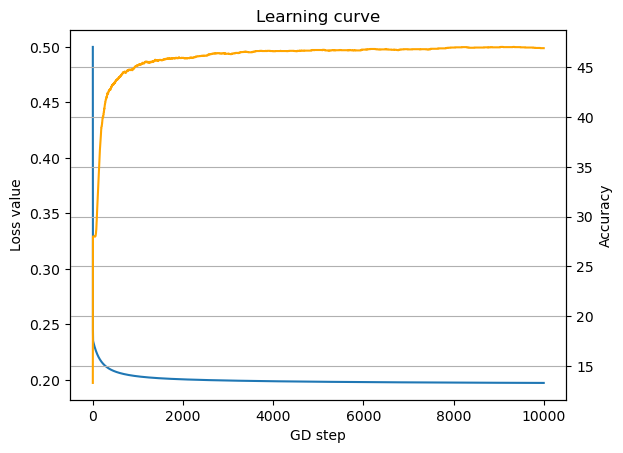

In [33]:
fig, ax = plt.subplots()

ax.plot(range(len(metrics_history['loss'])), metrics_history['loss'])
ax.set_ylabel('Loss value')

ax2 = ax.twinx()
ax2.plot(range(len(metrics_history['accuracy'])), metrics_history['accuracy'], color='orange')
ax2.set_ylabel('Accuracy')

ax.set_xlabel('GD step')

plt.title('Learning curve')
plt.grid()

print(f"The final train accuracy: {round(metrics_history['accuracy'][-1],1)}%")
print(f"Test accuracy: {round(accuracy(prediction, y_test, one_hot_encoded_labels=False),1)}%")

In [34]:
from AppliedML.courselib.utils.metrics import plot_confusion_matrix

def confusion_matrix(y_true, y_pred, num_classes=None):

    y_true = np.asarray(y_true, dtype=int)
    y_pred = np.asarray(y_pred, dtype=int)
    
    if num_classes is None:
        num_classes = max(y_true.max(), y_pred.max()) + 1
    
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        if 0 <= t < num_classes and 0 <= p < num_classes:
            cm[t, p] += 1
        else:
            raise ValueError(f"Labels out of range: true={t}, pred={p}")
    return cm


4834
(4834,)


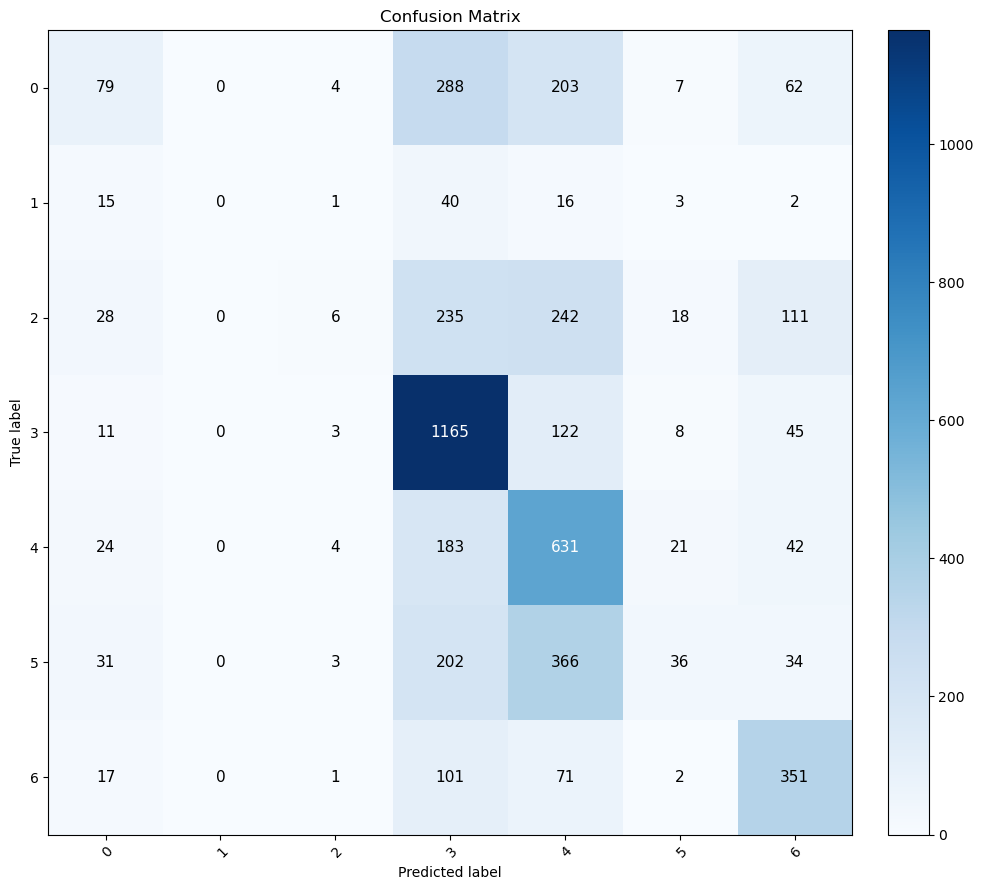

In [35]:

print(y_test.shape[-1])
print(prediction.shape)
plot_confusion_matrix(confusion_matrix(y_test, prediction), 
                      class_names=None,
                      figsize=(10,9))

Now we want to test if each class has the same amount of training data

In [36]:
#class 2 has the least amount of images
count = (df_test["emotion as integer"] == 1).sum()

label_col = df_test.columns[15]

#take as many pictures from each class as there are in class 2
df_test_equal = (df_test.groupby(label_col, group_keys=False).sample(n=count, random_state=42))
print(len(df_test_equal))



539


In [37]:
#prepare the equally spit data
X_equal, y_equal = prepare_df(df_test_equal)

In [38]:
#Now train a new model with the data
model_equal = LinearMulticlassClassification(w=w0, b=b0, optimizer=optimizer)

# fit for, say, 1000 steps or until convergence
metrics_history_equal = model_equal.fit(X_equal, y_equal, num_epochs=10000, batch_size=len(X_equal), compute_metrics=True, metrics_dict=metrics_dict)

pred_idxs_equal = model_equal(X_test)

The final train accuracy: 43.0%
Test accuracy: 38.8%


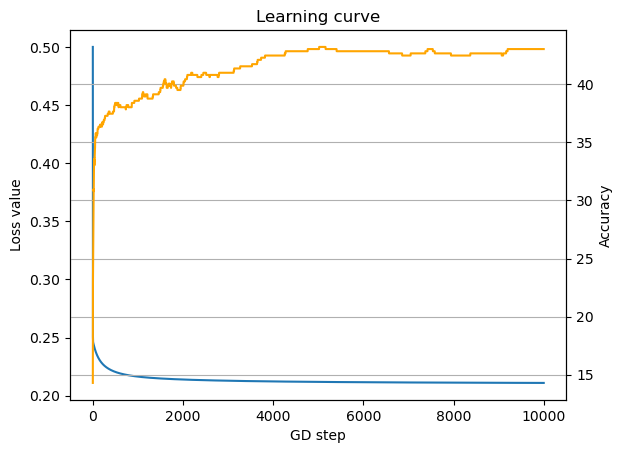

In [39]:
fig, ax = plt.subplots()

ax.plot(range(len(metrics_history_equal['loss'])), metrics_history_equal['loss'])
ax.set_ylabel('Loss value')

ax2 = ax.twinx()
ax2.plot(range(len(metrics_history_equal['accuracy'])), metrics_history_equal['accuracy'], color='orange')
ax2.set_ylabel('Accuracy')

ax.set_xlabel('GD step')

plt.title('Learning curve')
plt.grid()

print(f"The final train accuracy: {round(metrics_history_equal['accuracy'][-1],1)}%")
print(f"Test accuracy: {round(accuracy(model_equal(X_test), y_test, one_hot_encoded_labels = False),1)}%")

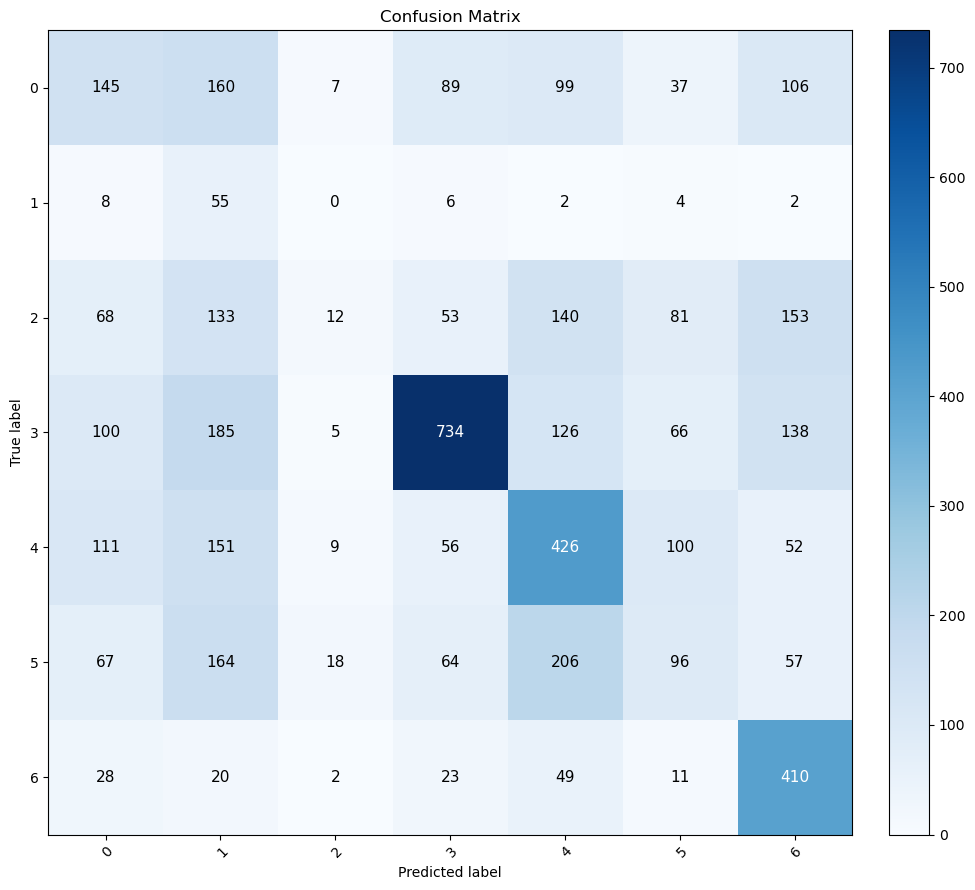

In [40]:
plot_confusion_matrix(confusion_matrix(y_test, pred_idxs_equal), 
                      class_names=None,
                      figsize=(10,9))

It seems like the data might not be linearly seperable. We will now test if we could seperate two opposite emotions. Like angry 0 and happy 3 or neutral 4 and surprise 6

In [54]:
def prepare_data_two_emotions(df, label1, label2):
    label_df = df.iloc[:,15]

    mask = label_df.isin([label1, label2])

    filtered_df = df.loc[mask].copy()

    labels = filtered_df.iloc[:,15].map({label1: 1, label2: -1})

    filtered_df = filtered_df.iloc[:,:15]

    col_max = filtered_df.max(axis=0)                  
    col_max[col_max == 0] = 1                   

    filtered_df = (filtered_df / col_max)

    return filtered_df, labels

X_angry_happy, y_angry_happy = prepare_data_two_emotions(df_train, 0, 3)

X_angry_happy


mouth distance  right eye area  left eye area  mouth area  \
0            0.521122        0.253974       0.230674    0.433287   
1            0.310156        0.149272       0.147582    0.256252   
3            0.680999        0.094476       0.071621    0.461466   
10           0.350740        0.201067       0.117197    0.176940   
12           0.038105        0.168278       0.168665    0.143957   
...               ...             ...            ...         ...   
18702        0.254750        0.307769       0.286275    0.319917   
18703        0.274929        0.128710       0.120401    0.315060   
18704        0.355651        0.200178       0.172902    0.210548   
18706        0.054262        0.353562       0.355519    0.149917   
18709        0.241668        0.139936       0.115544    0.328000   

       right eye to eyelash distance  left eye to eyelash distance  \
0                           0.416393                      0.387309   
1                           0.594506                      0.593551   
3                           0.695730                      0.576793   
10                          0.494324                      0.402399   
12                          0.599043                      0.537592   
...                              ...                           ...   
18702                       0.530697                      0.484746   
18703                       0.406741                      0.398070   
18704                       0.523985                      0.481984   
18706                       0.442977                      0.471106   
18709                       0.596418                      0.496795   

       nose height  nose width  mouth to nose distance  \
0         0.605189    0.543450                0.291193   
1         0.496130    0.449162                0.552814   
3         0.546743    0.517732                0.363141   
10        0.418746    0.305439                0.197957   
12        0.575566    0.400707                0.406250   
...            ...         ...                     ...   
18702     0.590903    0.463701                0.340130   
18703     0.488477    0.466135                0.325666   
18704     0.373863    0.365337                0.277554   
18706     0.888475    0.808610                0.544404   
18709     0.560729    0.638564                0.358507   

       mouth to chin distance  head width  mouth to eye area ratio  \
0                    0.184688    0.687051                 0.001292   
1                    0.475019    0.811657                 0.001341   
3                    0.508107    0.642068                 0.000415   
10                   0.340441    0.468788                 0.002062   
12                   0.502979    0.657555                 0.002709   
...                       ...         ...                      ...   
18702                0.368333    0.682333                 0.002147   
18703                0.597917    0.639559                 0.000914   
18704                0.465021    0.623420                 0.002046   
18706                0.585075    0.827159                 0.005475   
18709                0.515901    0.681659                 0.000898   

       left to right eye ratio  mouth-chin angle  eye-nose angle  
0                     0.626537          0.579681        0.542550  
1                     0.583713          0.623599        0.749895  
3                     0.702946          0.409703        0.598966  
10                    0.715906          0.412260        0.505063  
12                    0.649391          0.552580        0.592699  
...                        ...               ...             ...  
18702                 0.638019          0.637978        0.578309  
18703                 0.595469          0.553897        0.646890  
18704                 0.633558          0.367821        0.757028  
18706                 0.547978          0.628475        0.429023  
18709                 0.699641          0.596431        0.629598  

[8042 

In [60]:
def prepare_data_two_emotions(df, label1, label2):
    label_df = df.iloc[:,15]

    mask = label_df.isin([label1, label2])

    filtered_df = df.loc[mask].copy()

    labels = filtered_df.iloc[:,15].map({label1: 1, label2: -1}).to_numpy()

    filtered_df = filtered_df.iloc[:,:15]

    col_max = filtered_df.max(axis=0)                  
    col_max[col_max == 0] = 1                   

    filtered_df = (filtered_df / col_max).to_numpy()

    return filtered_df, labels

X_angry_happy, y_angry_happy = prepare_data_two_emotions(df_train, 0, 3)

X_angry_happy


array([[0.52112243, 0.25397355, 0.23067383, ..., 0.62653682, 0.57968063,
        0.54254977],
       [0.31015562, 0.14927198, 0.14758165, ..., 0.58371252, 0.62359906,
        0.74989548],
       [0.68099922, 0.09447594, 0.0716205 , ..., 0.70294584, 0.40970276,
        0.59896593],
       ...,
       [0.35565055, 0.20017784, 0.17290203, ..., 0.63355825, 0.36782058,
        0.75702819],
       [0.05426214, 0.3535623 , 0.35551881, ..., 0.54797803, 0.62847452,
        0.42902297],
       [0.24166833, 0.13993553, 0.11554361, ..., 0.69964067, 0.59643098,
        0.62959819]])

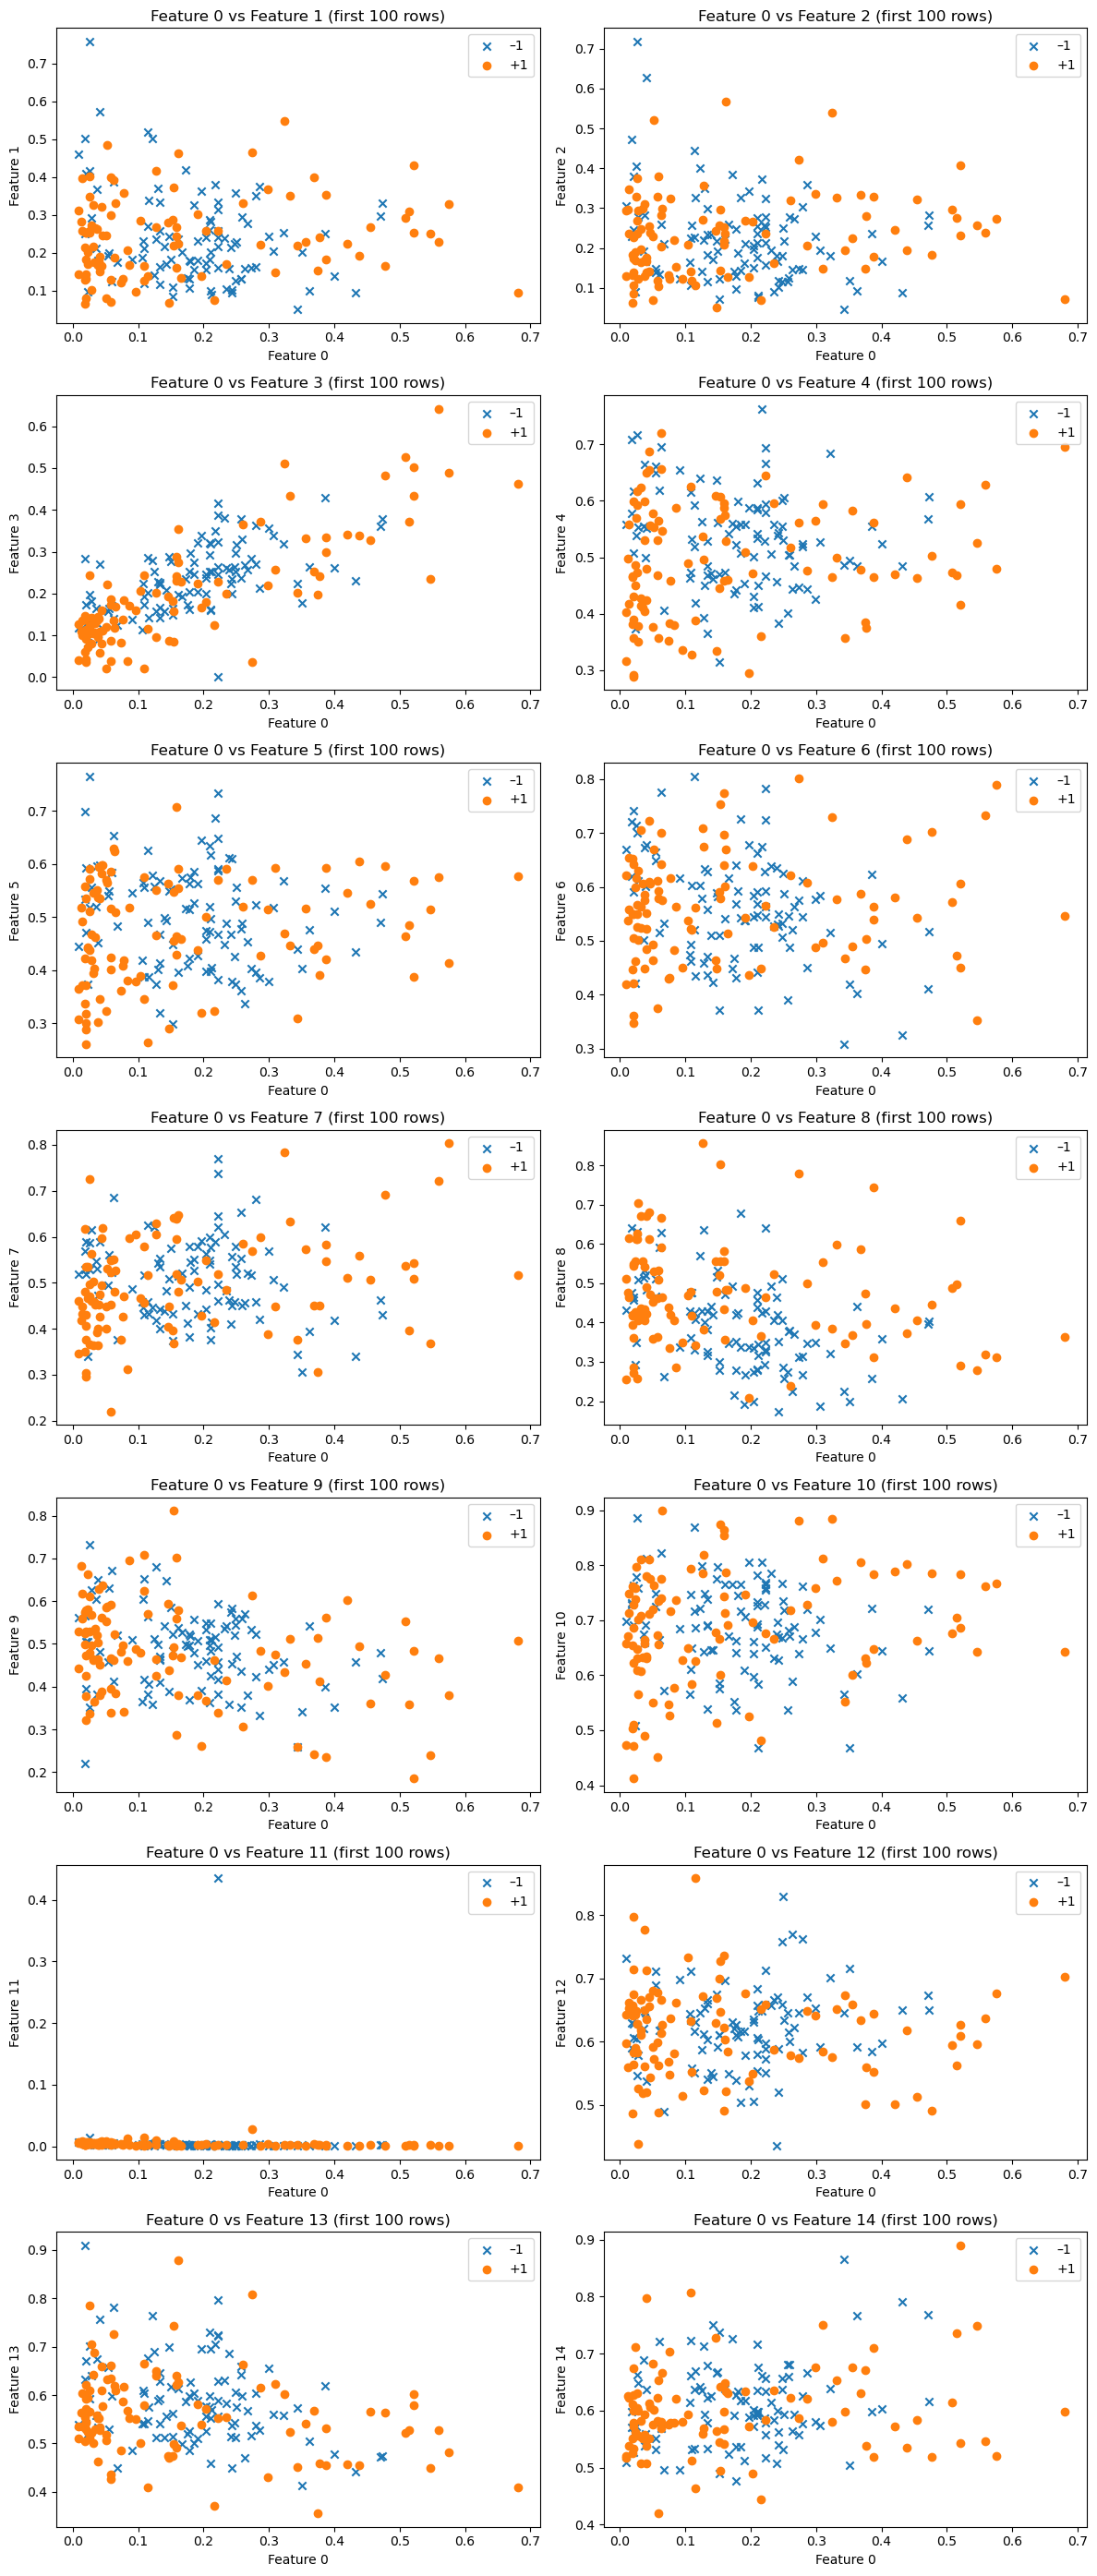

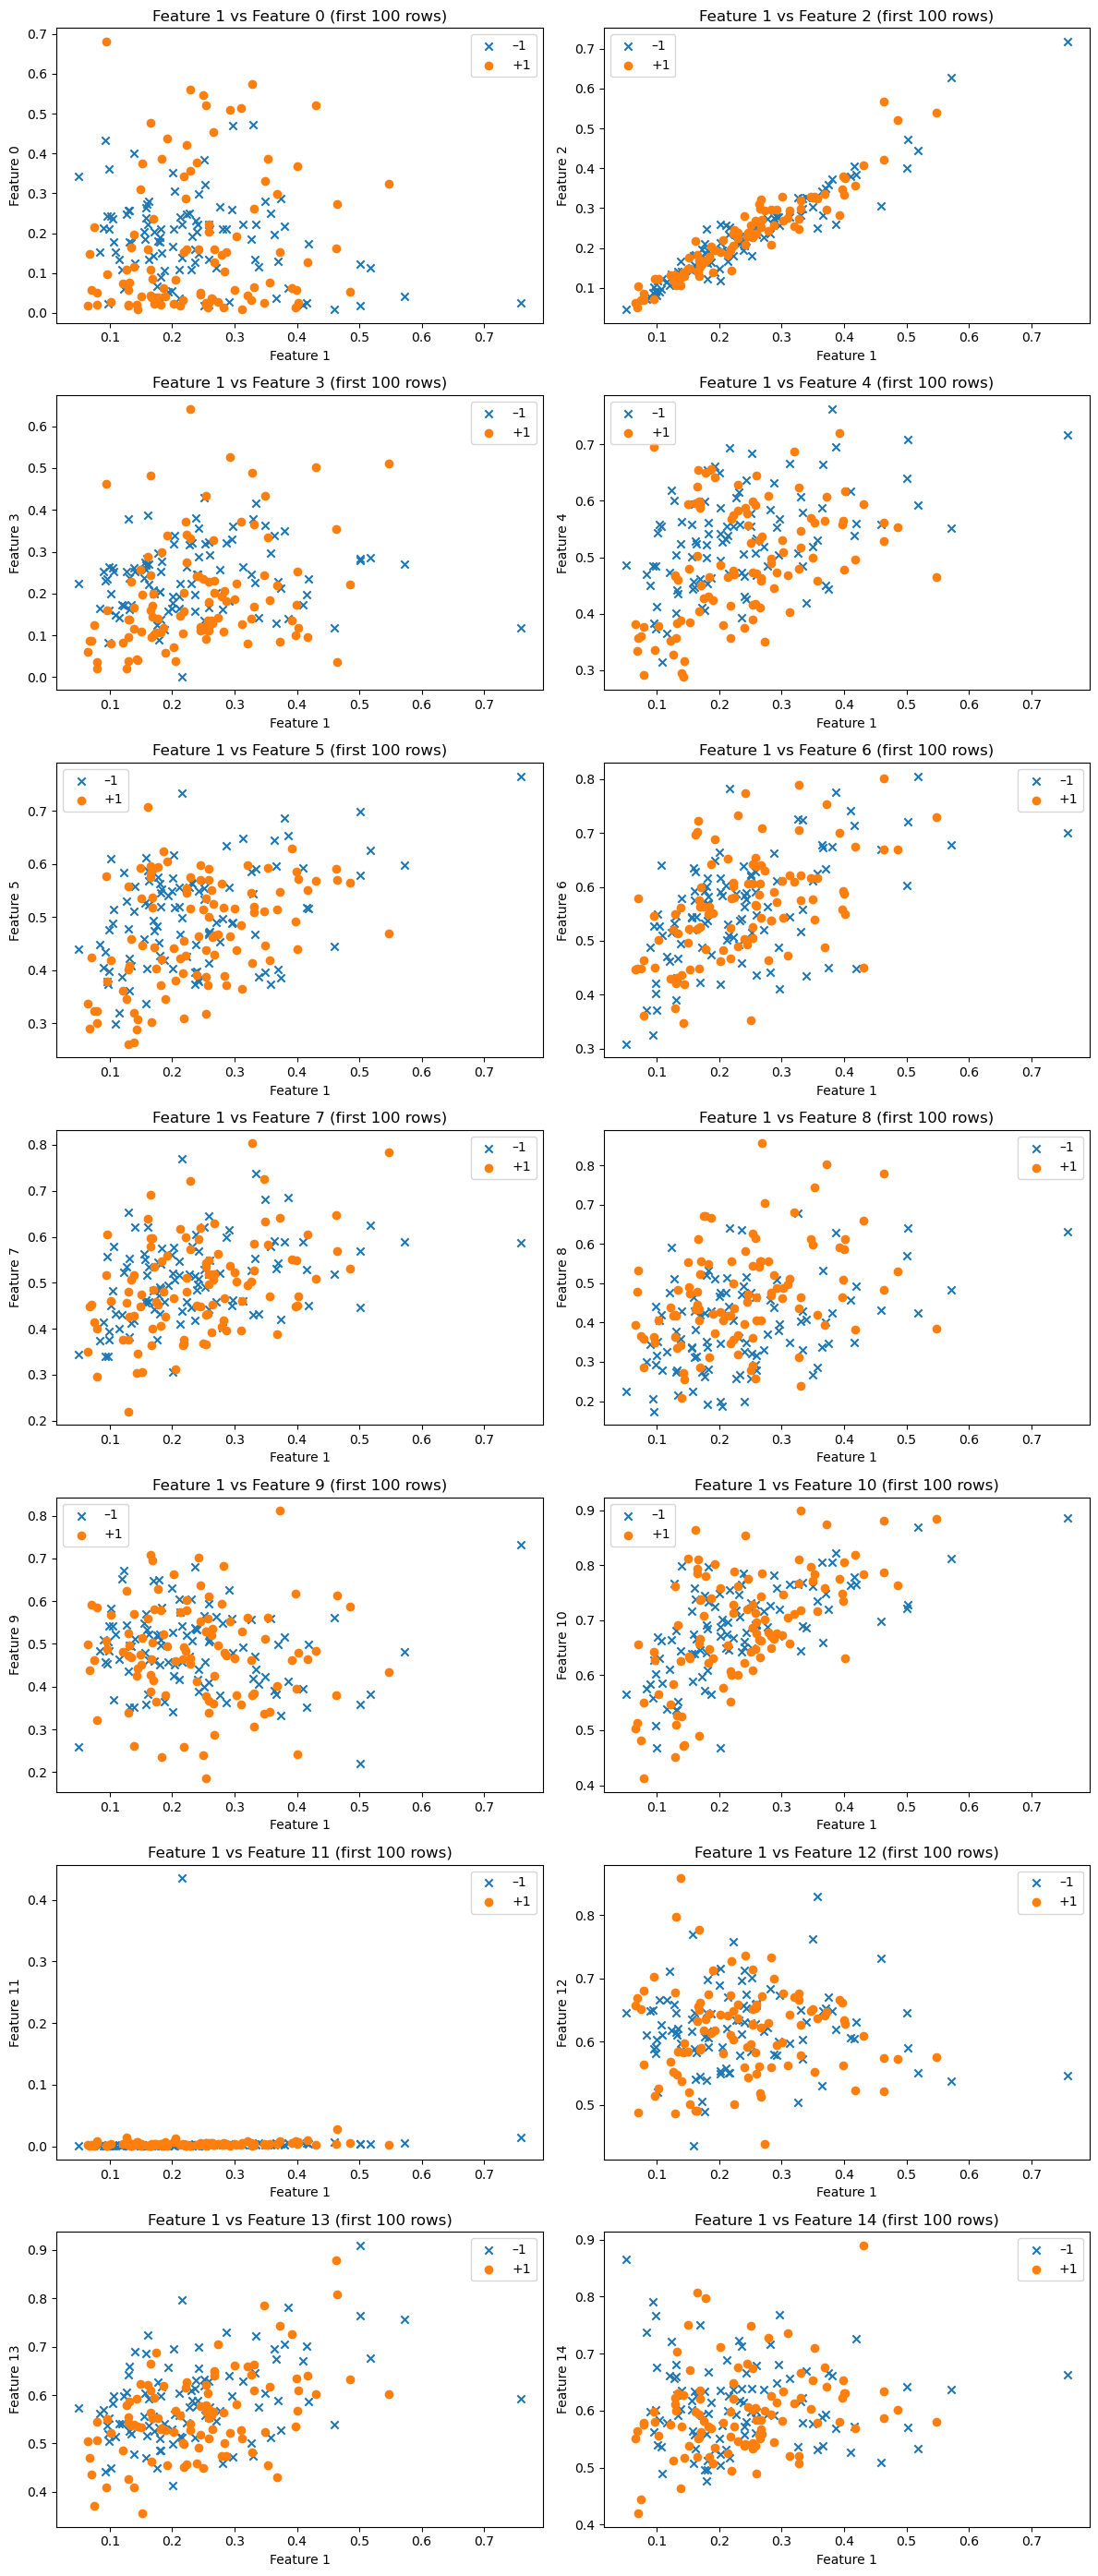

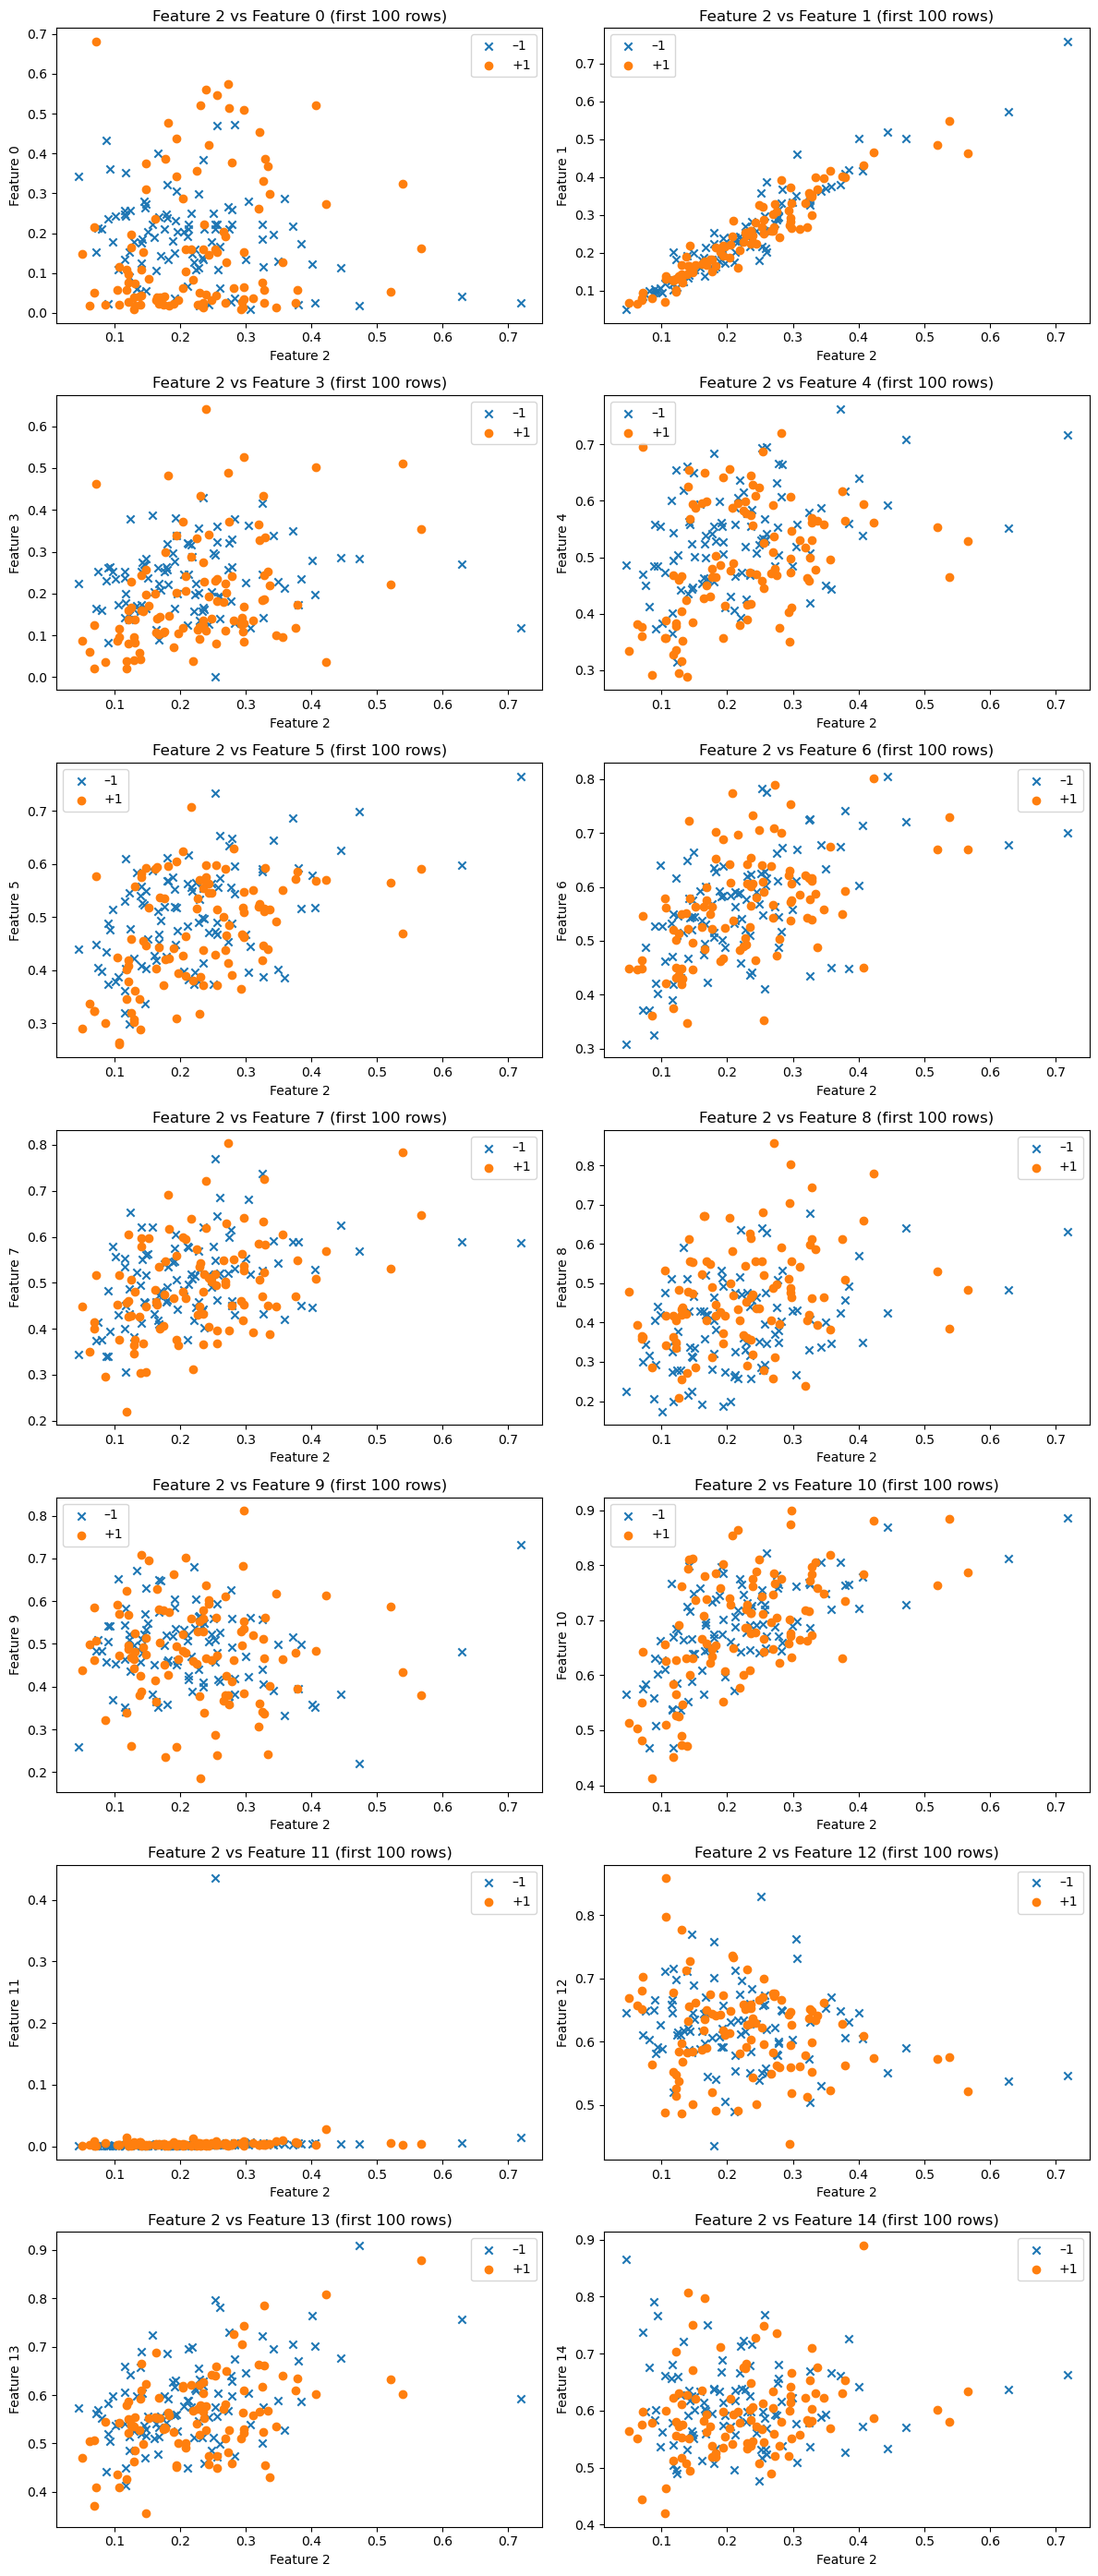

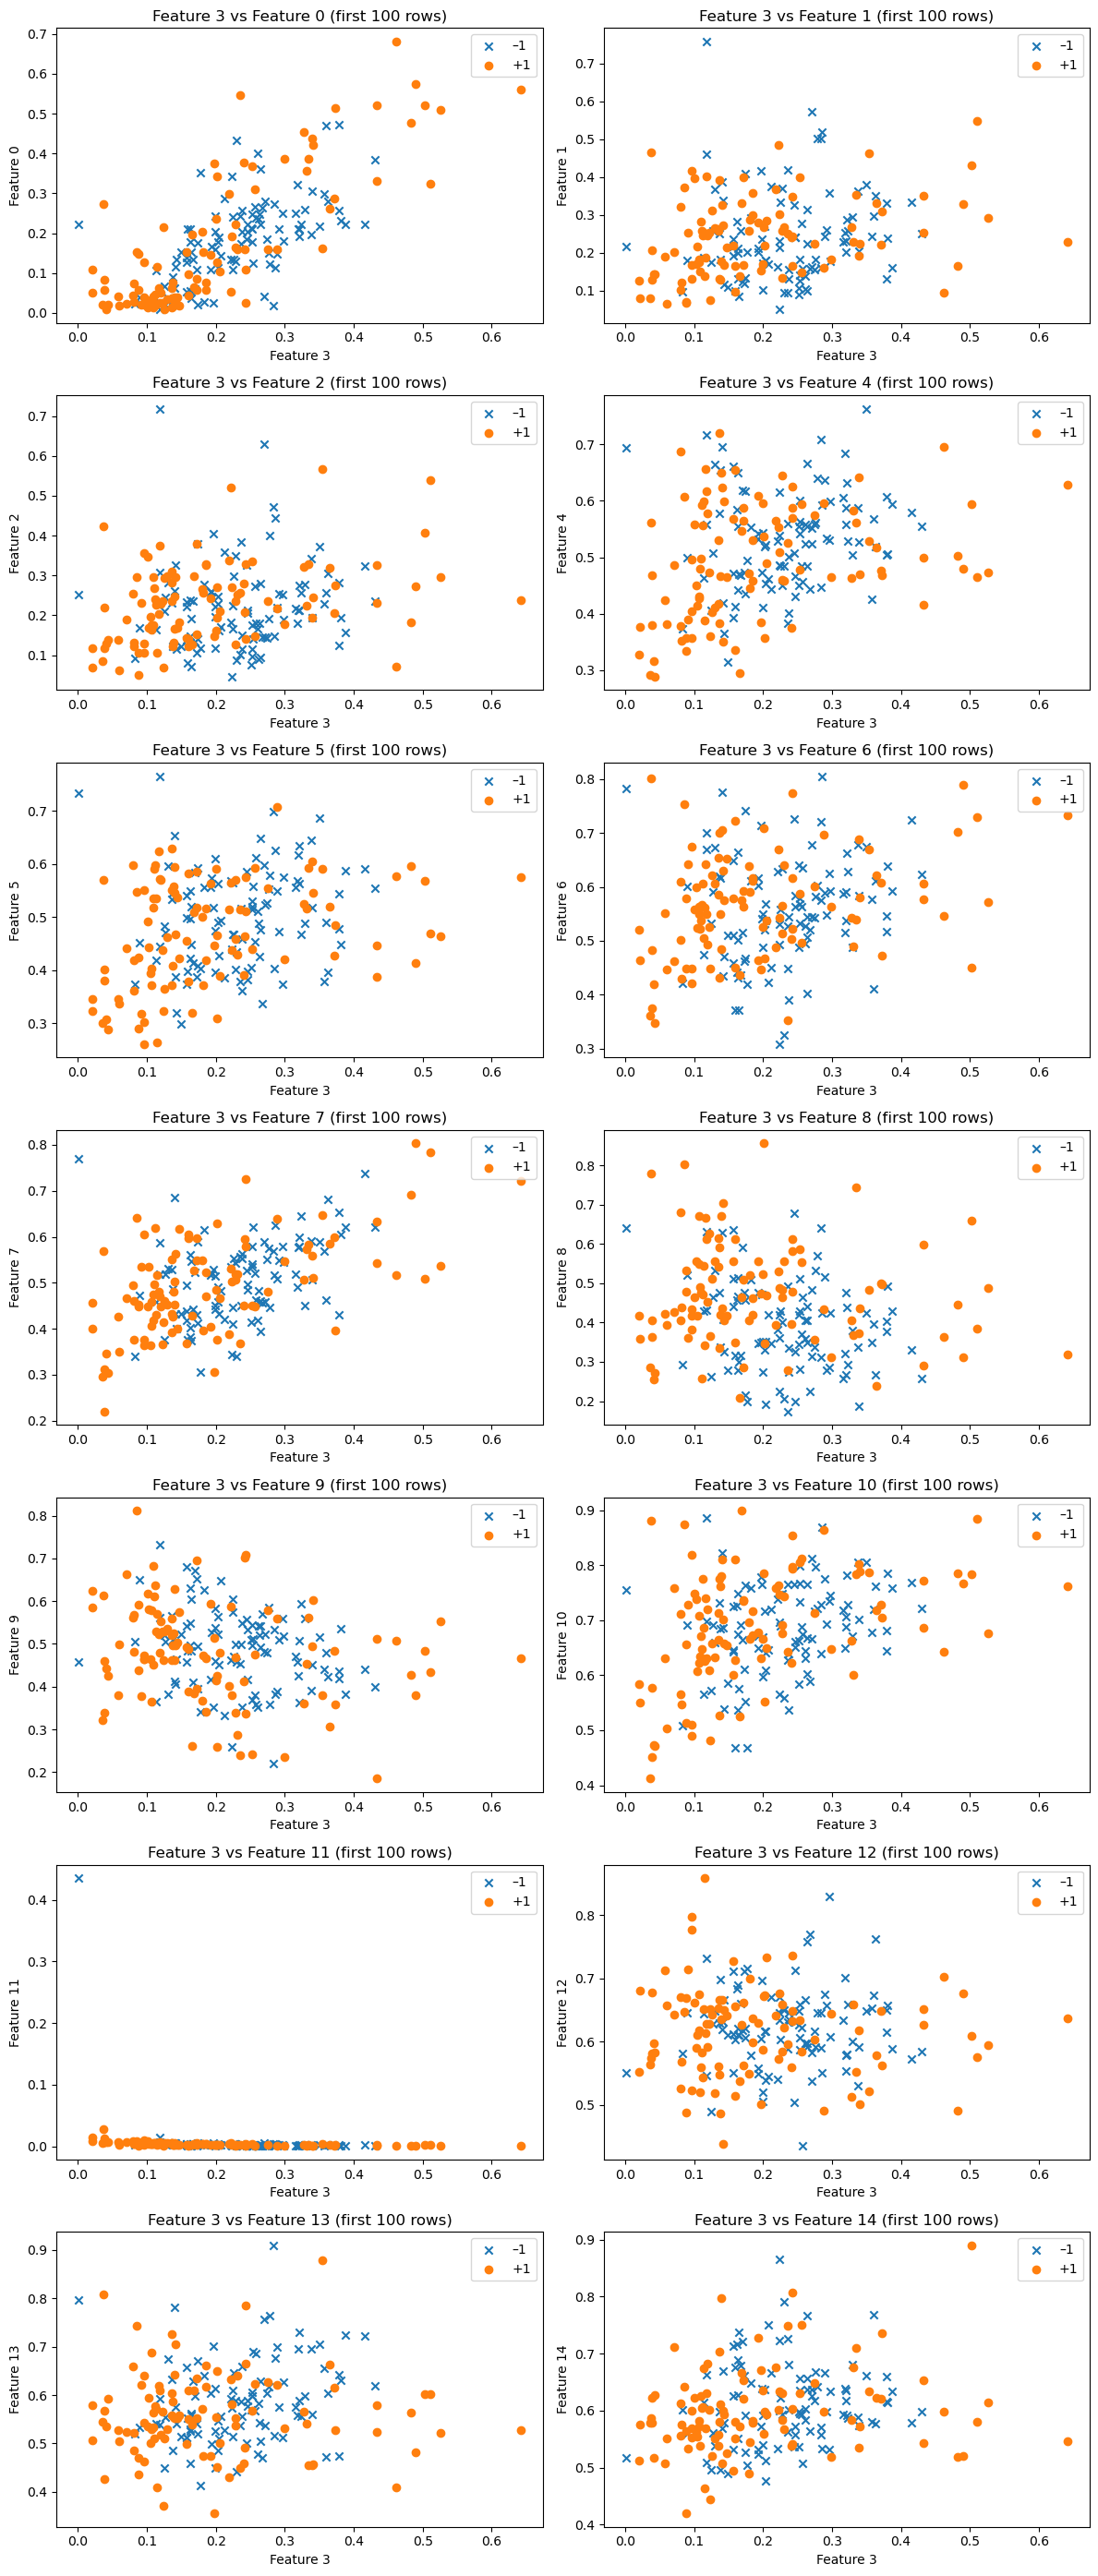

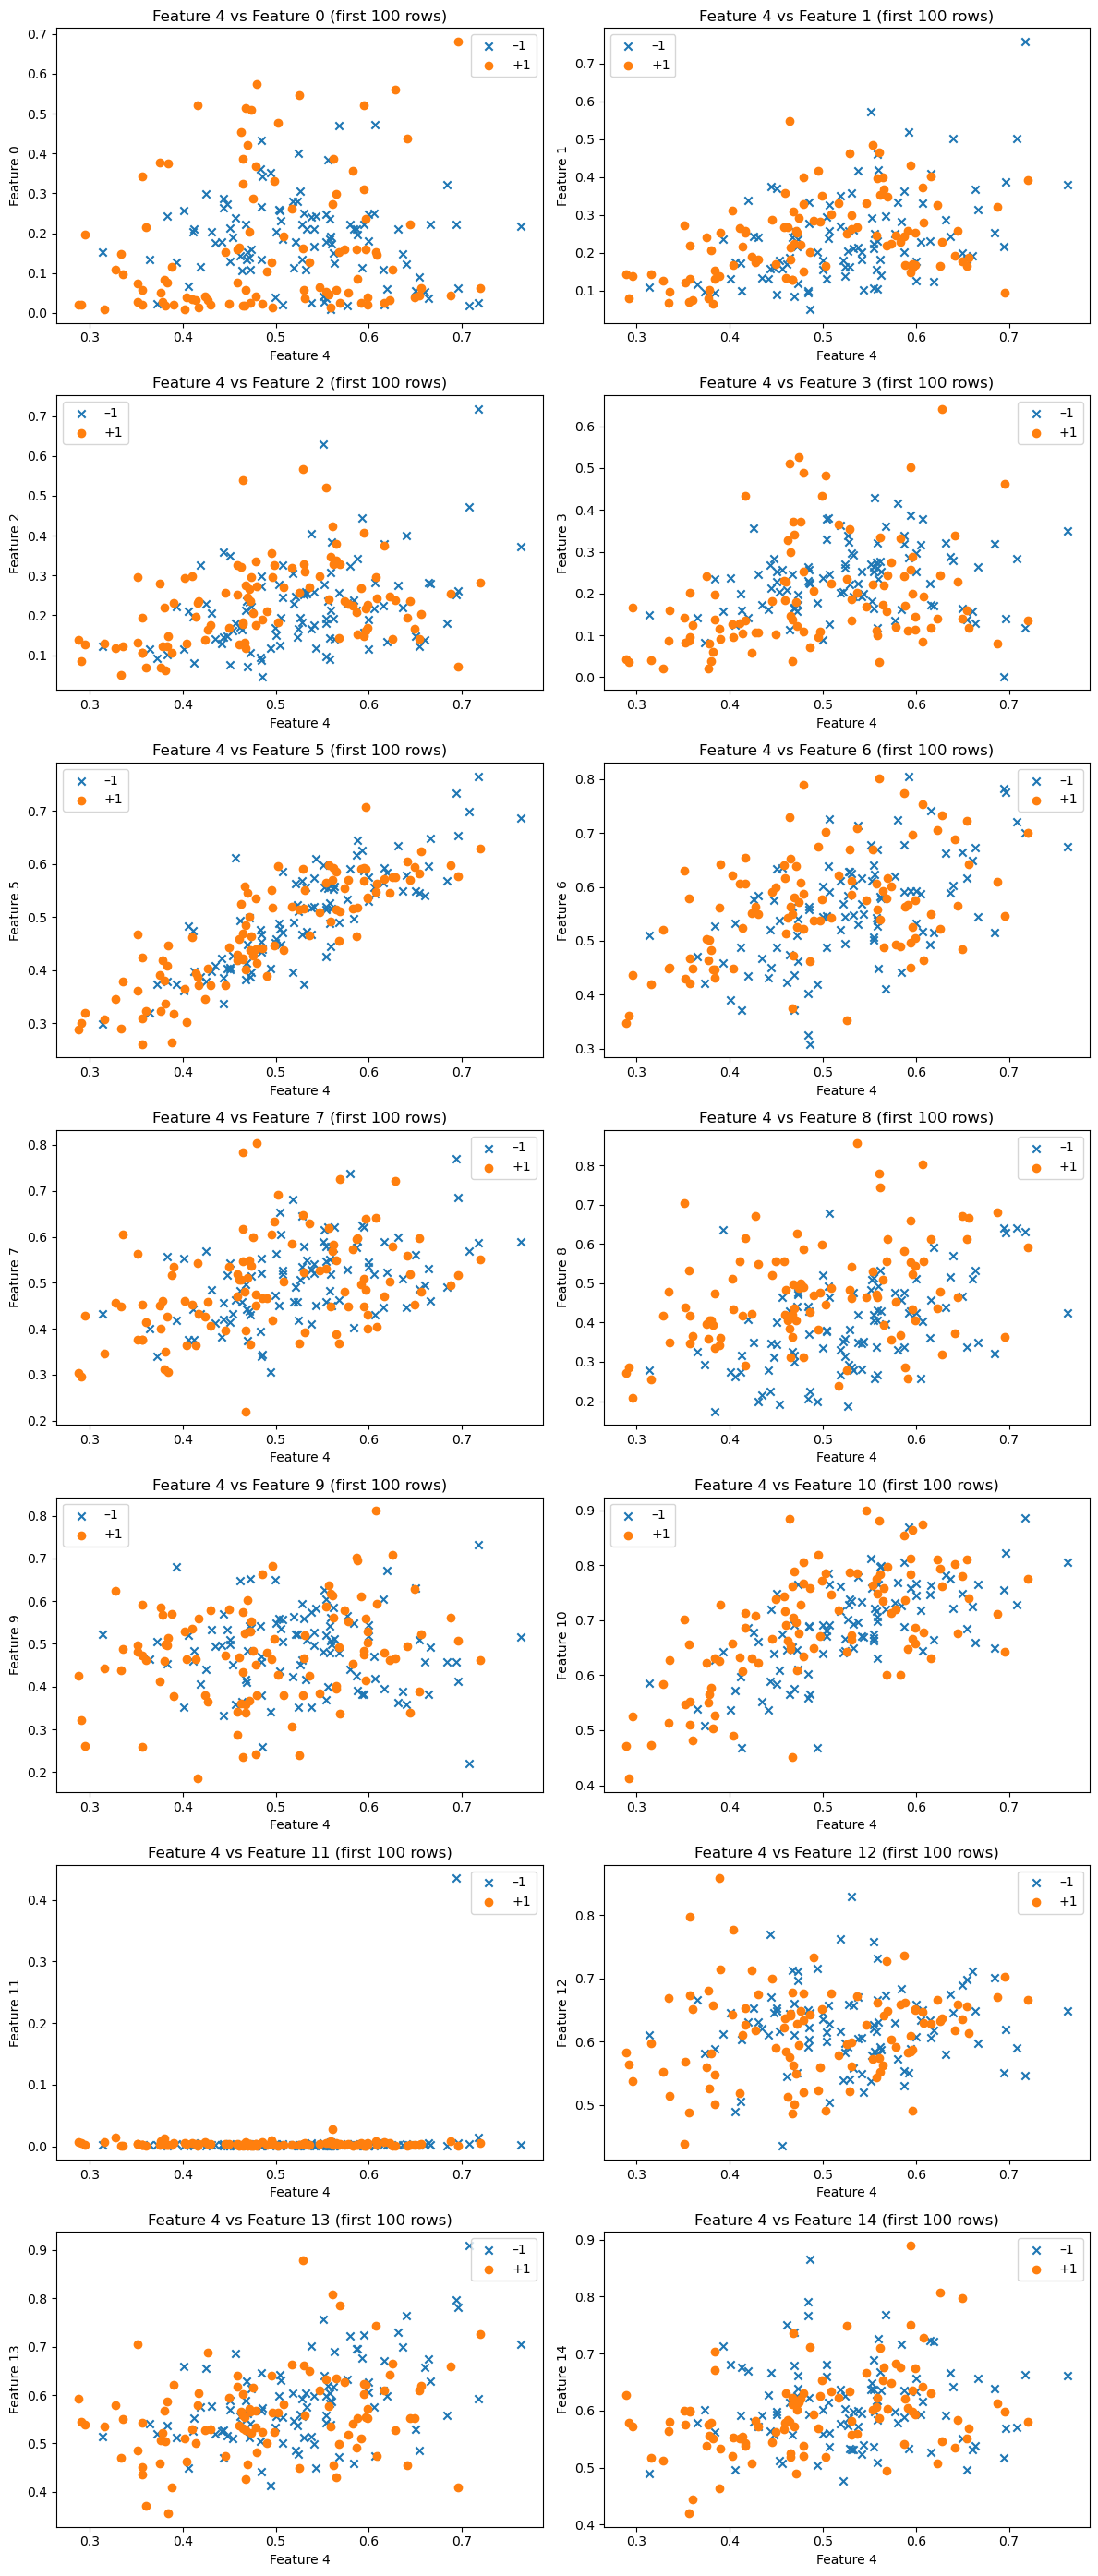

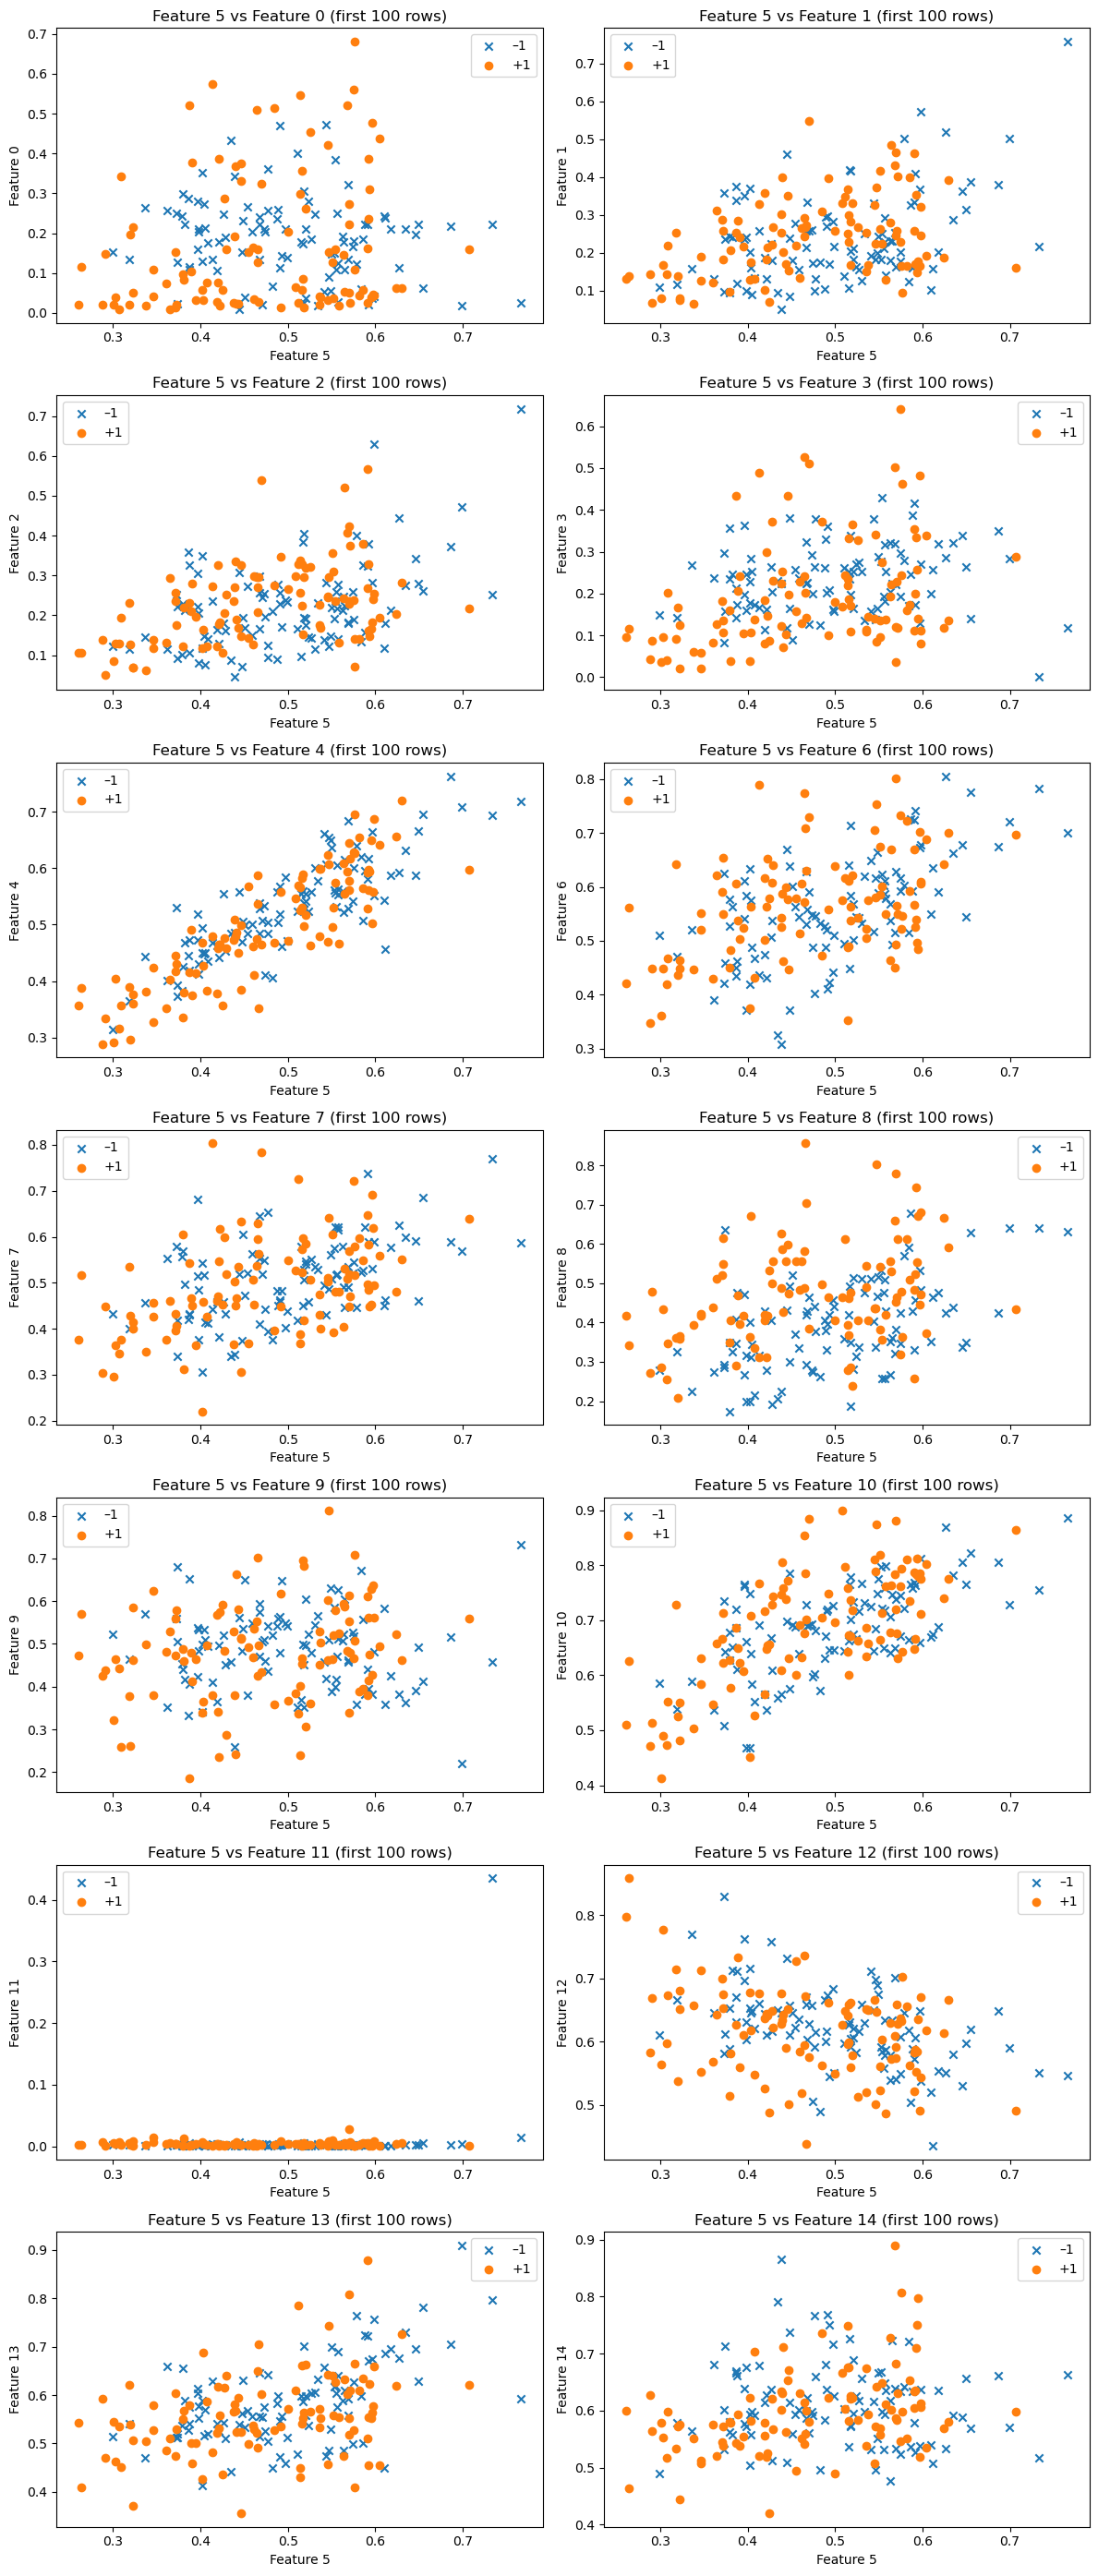

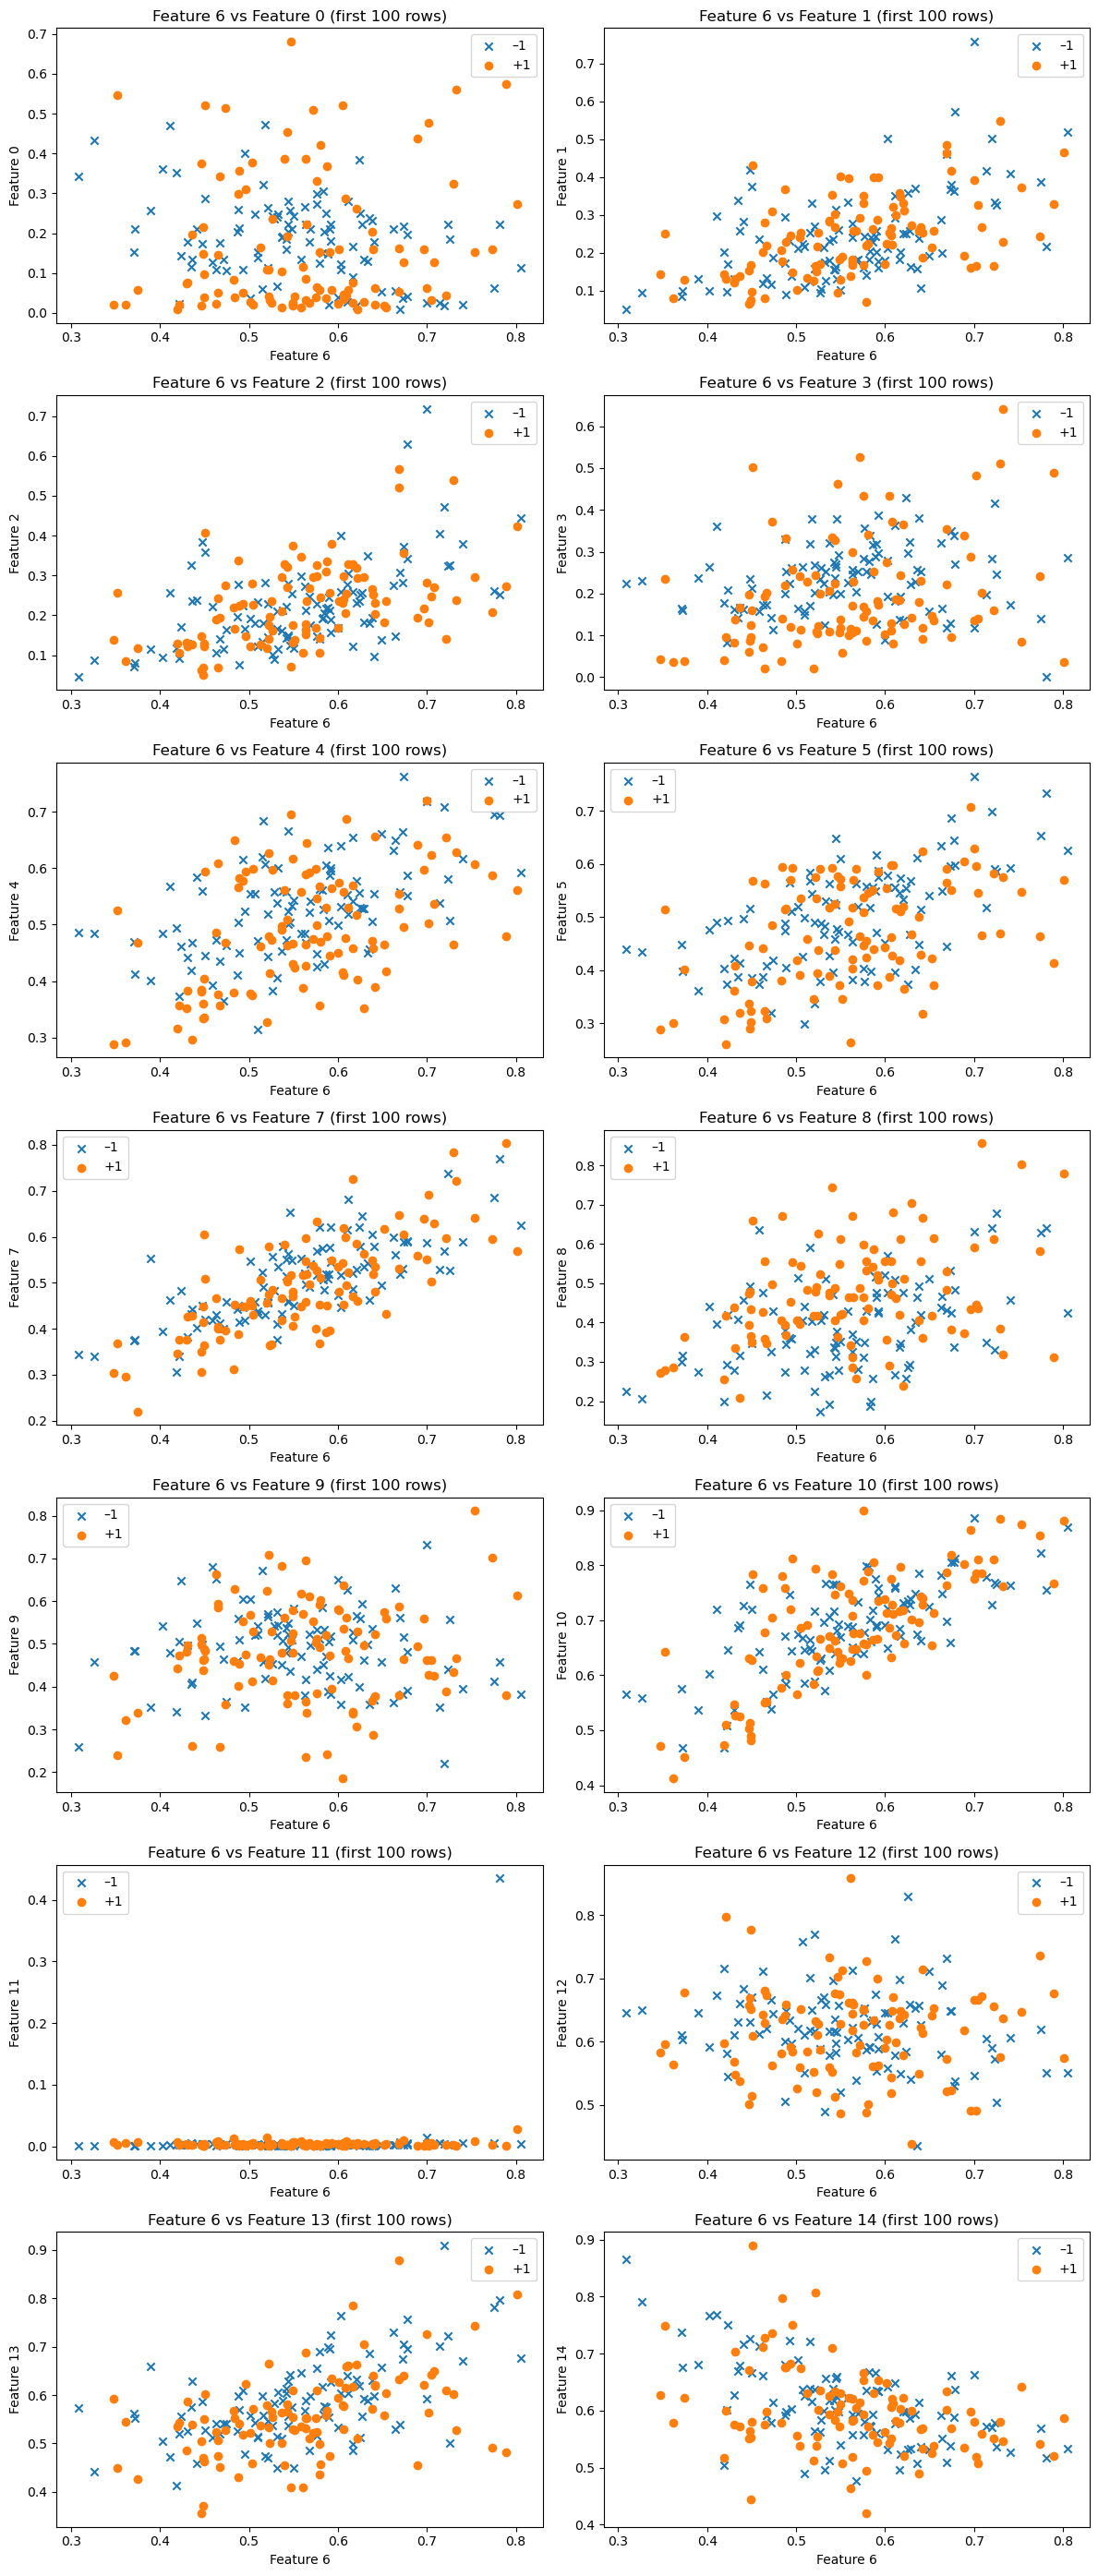

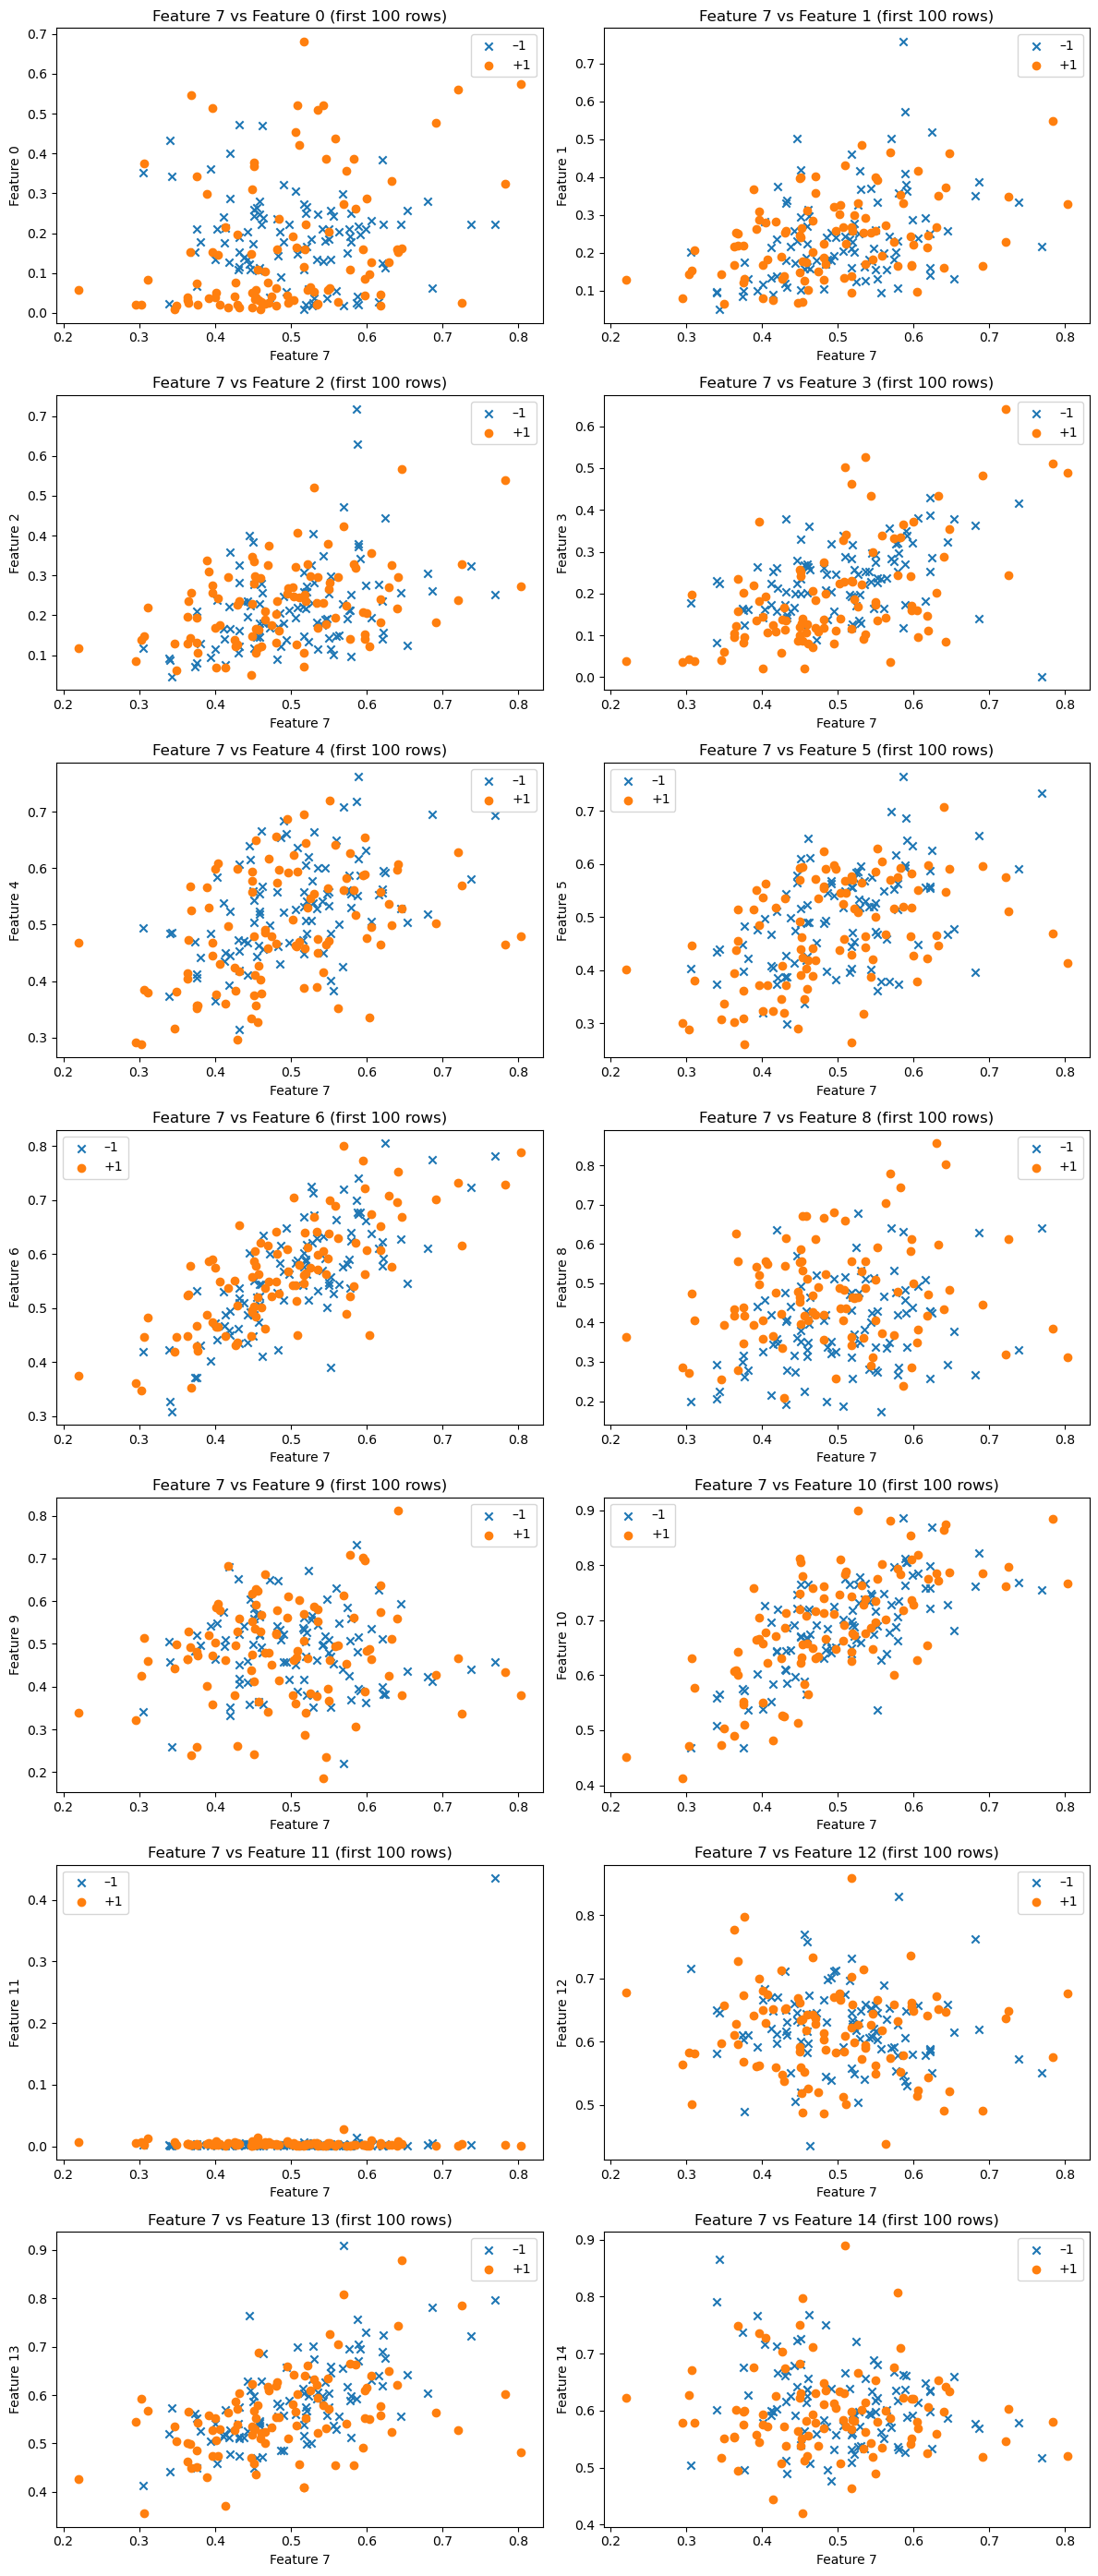

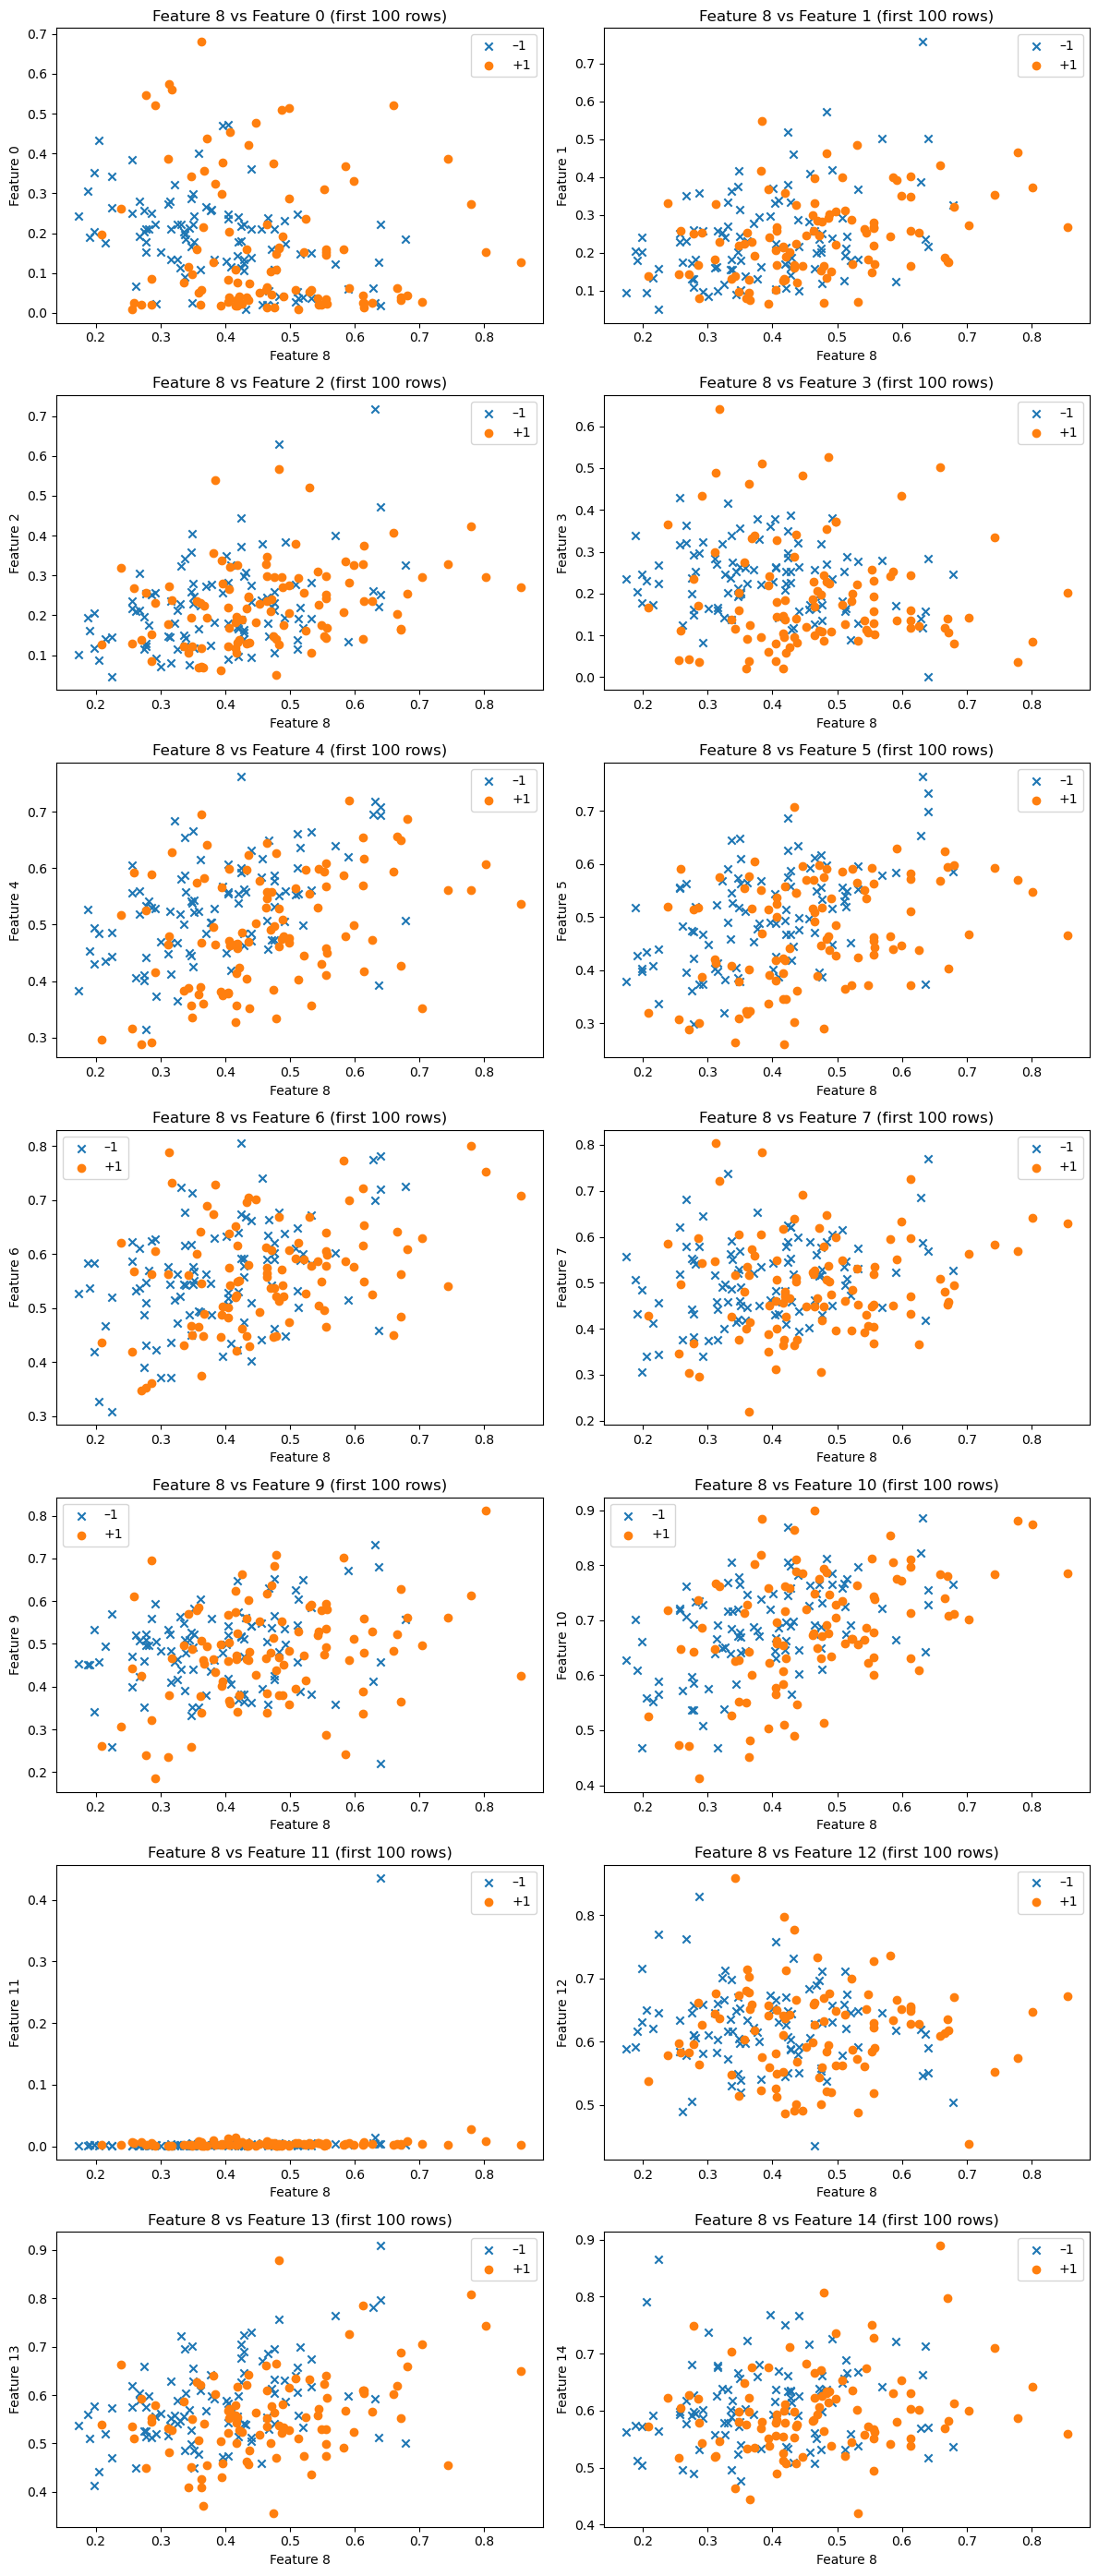

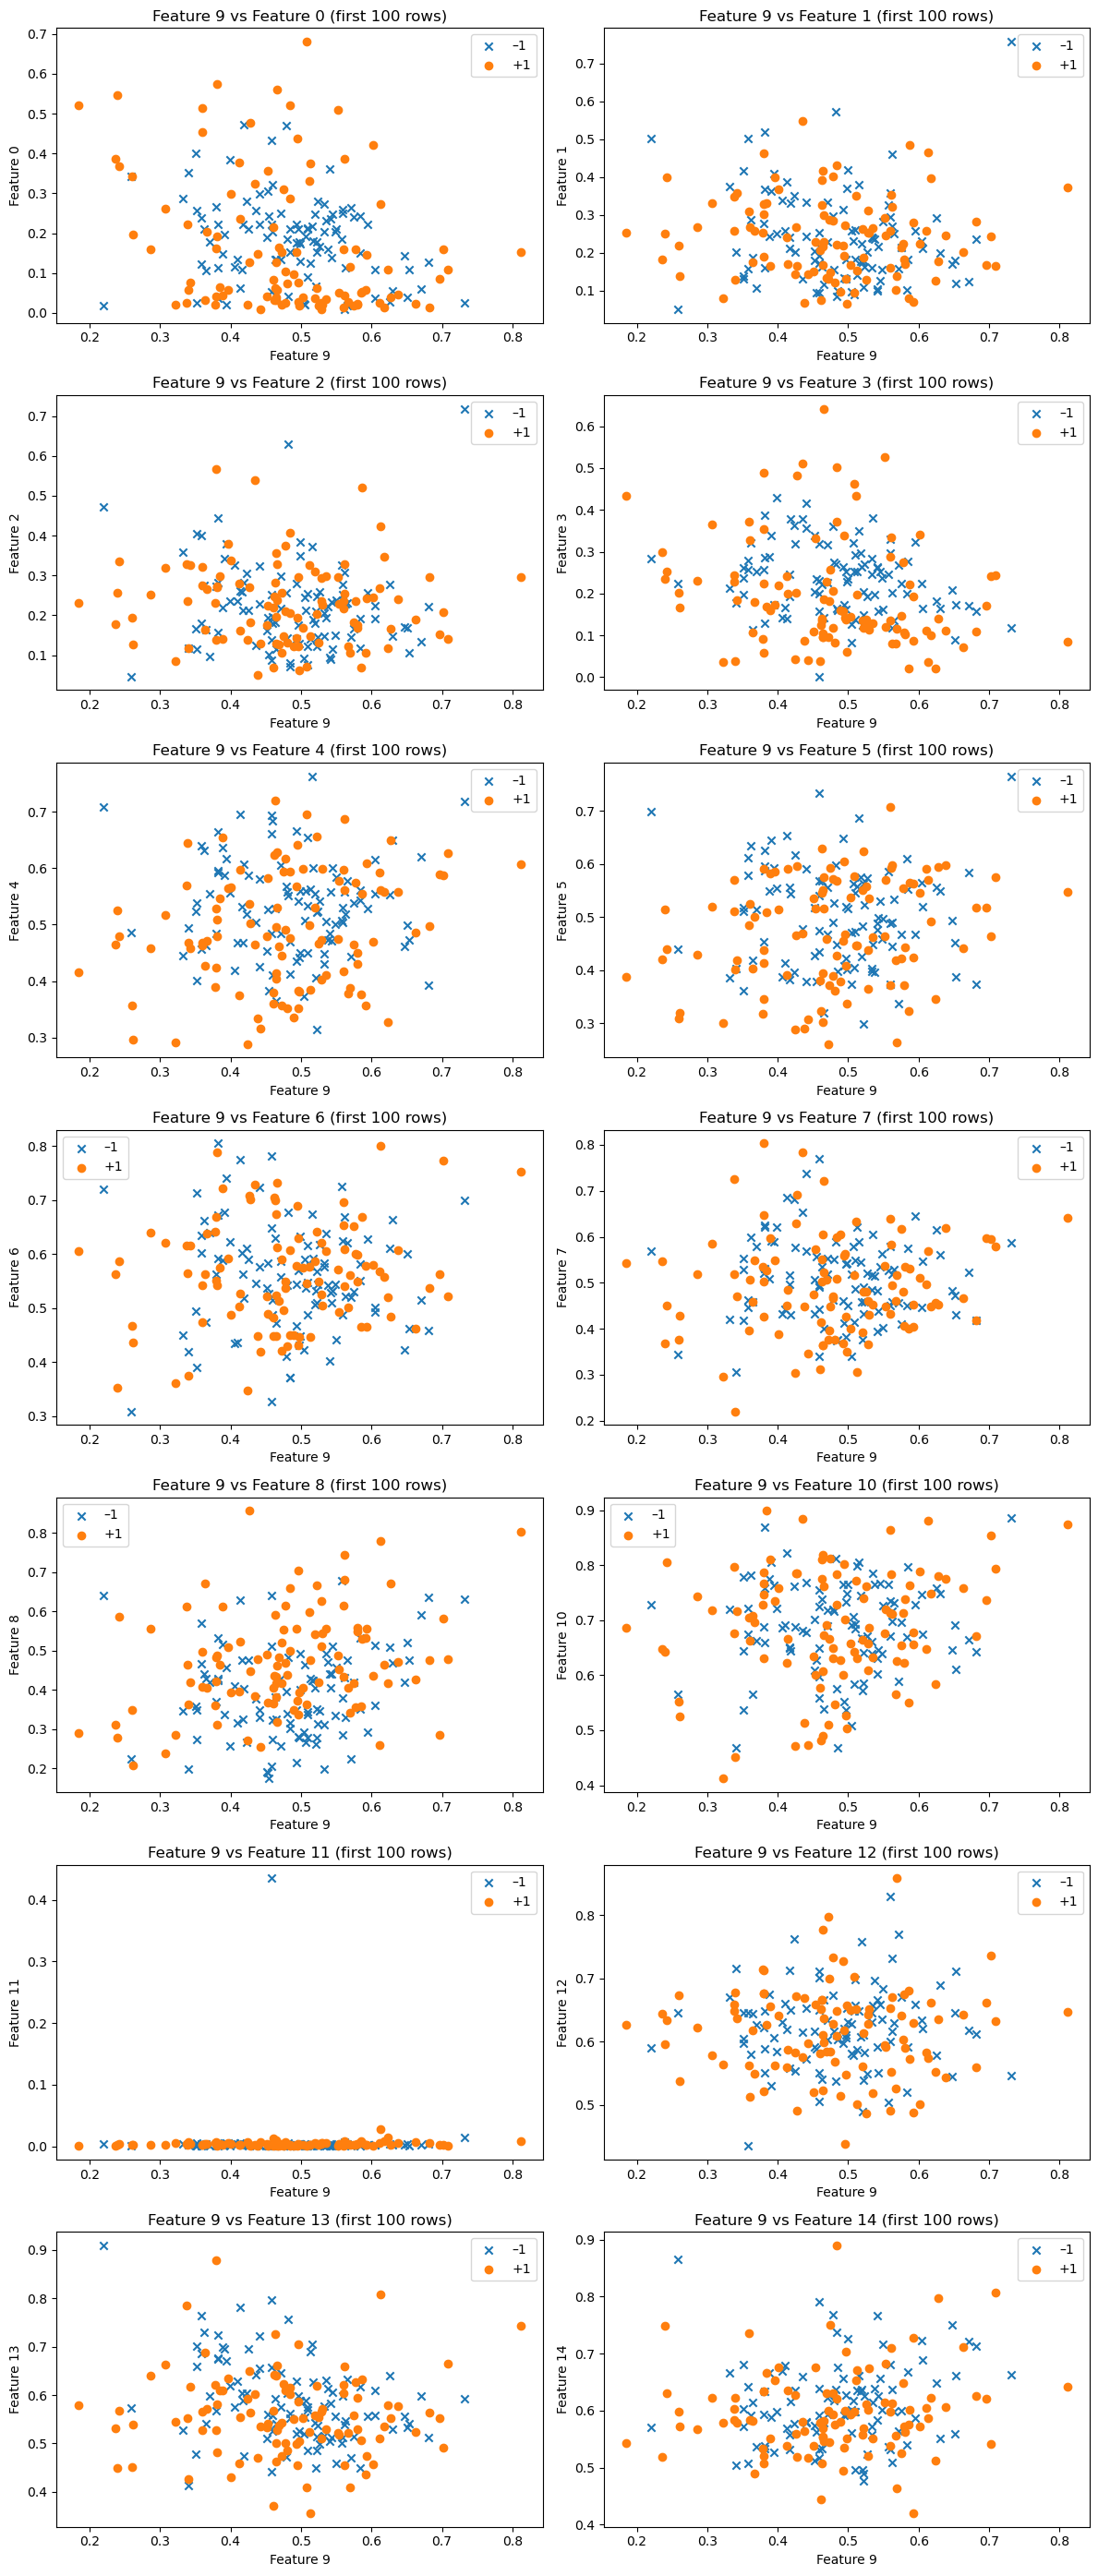

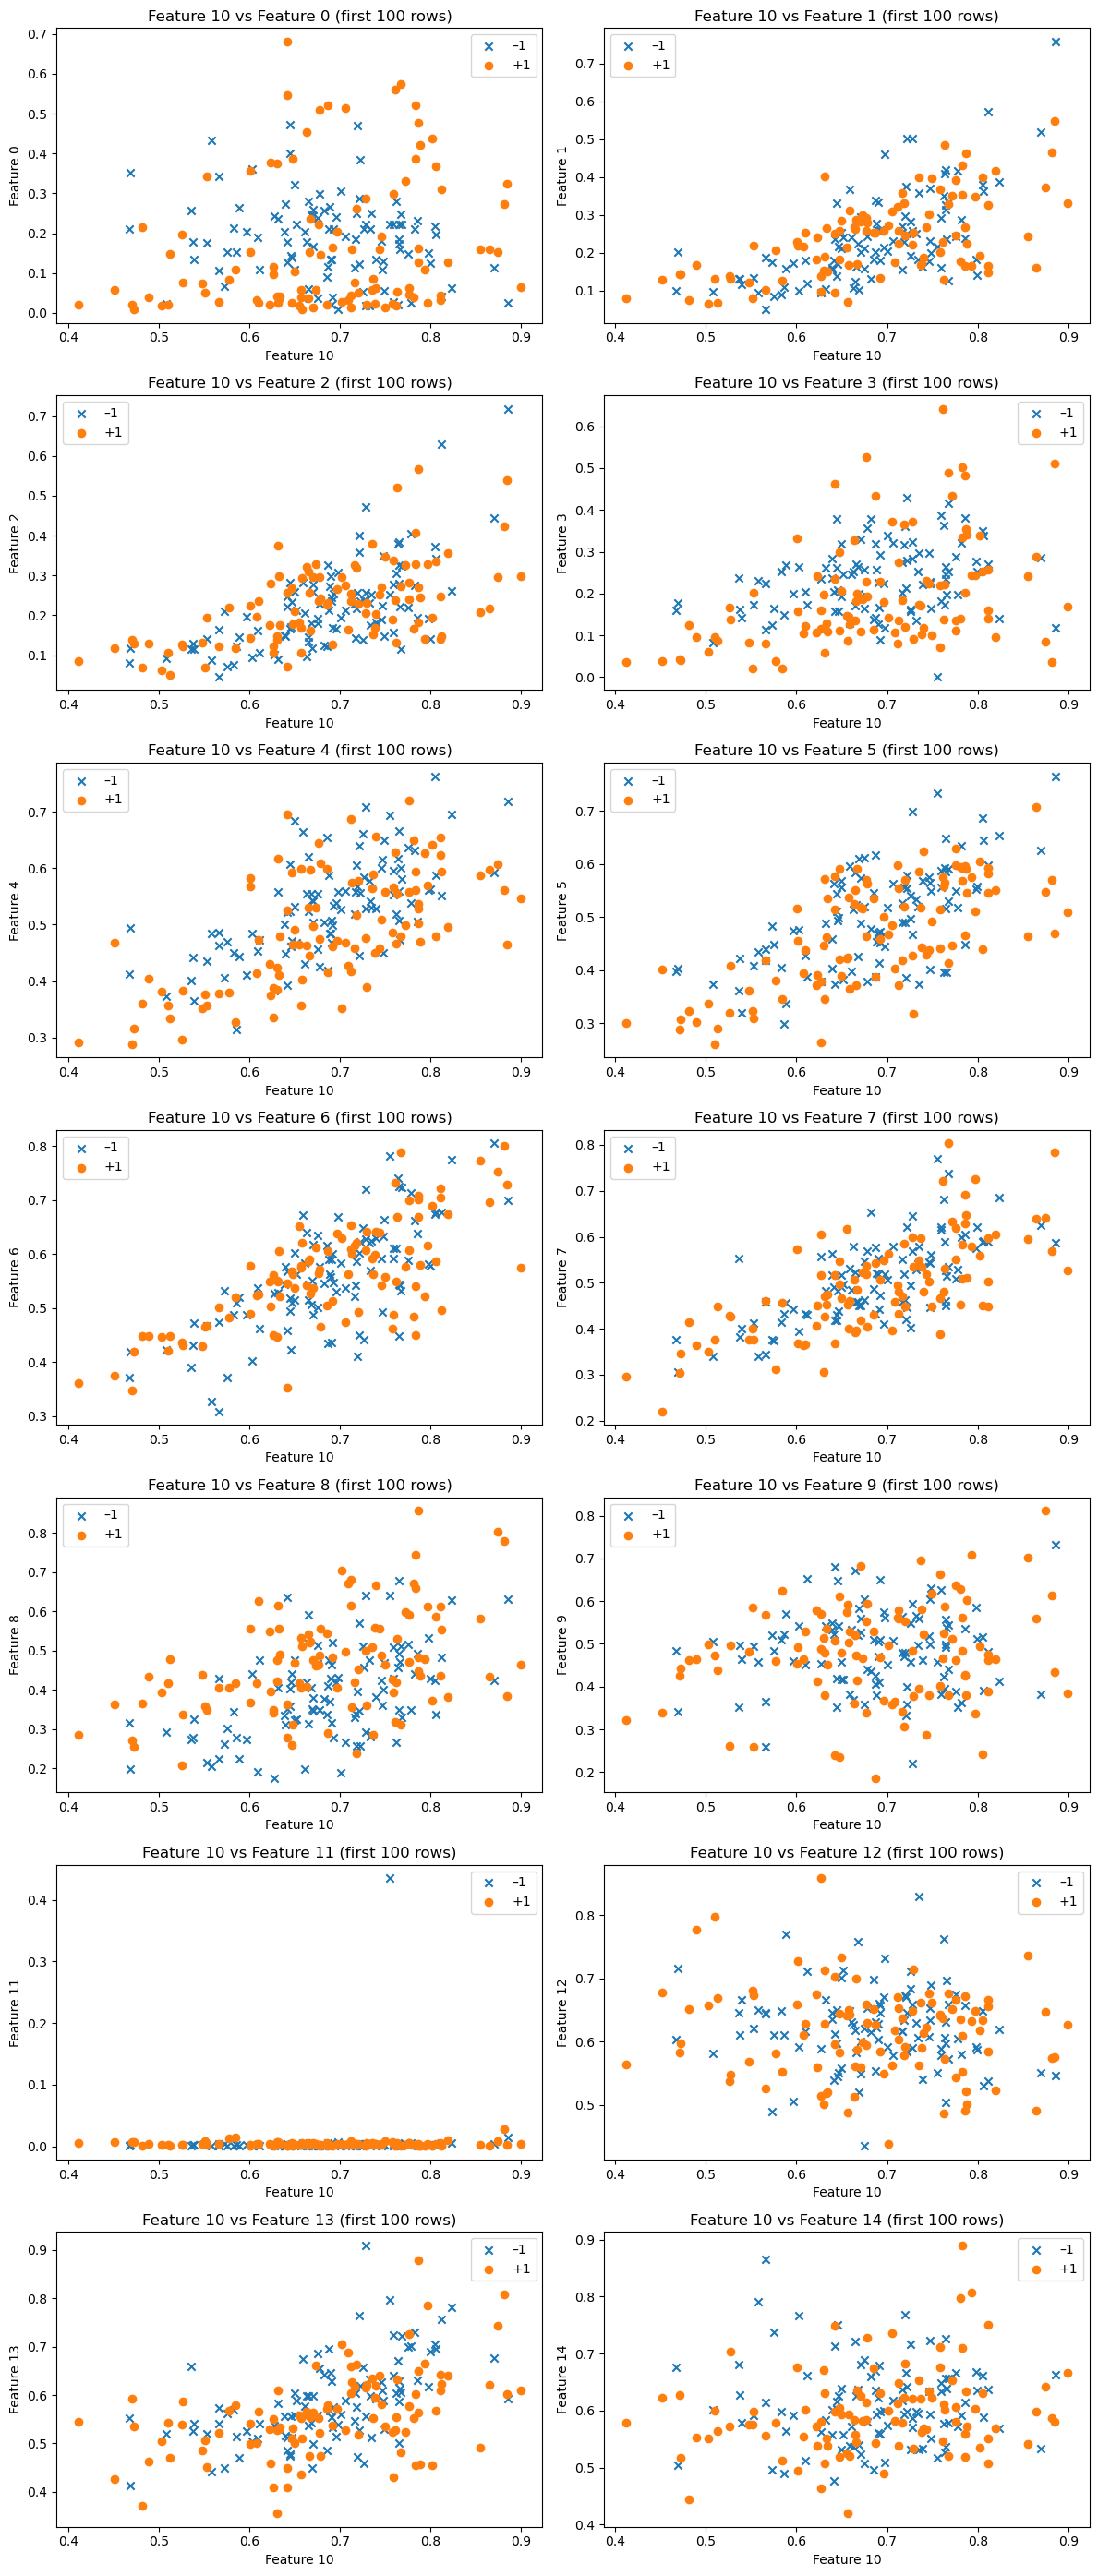

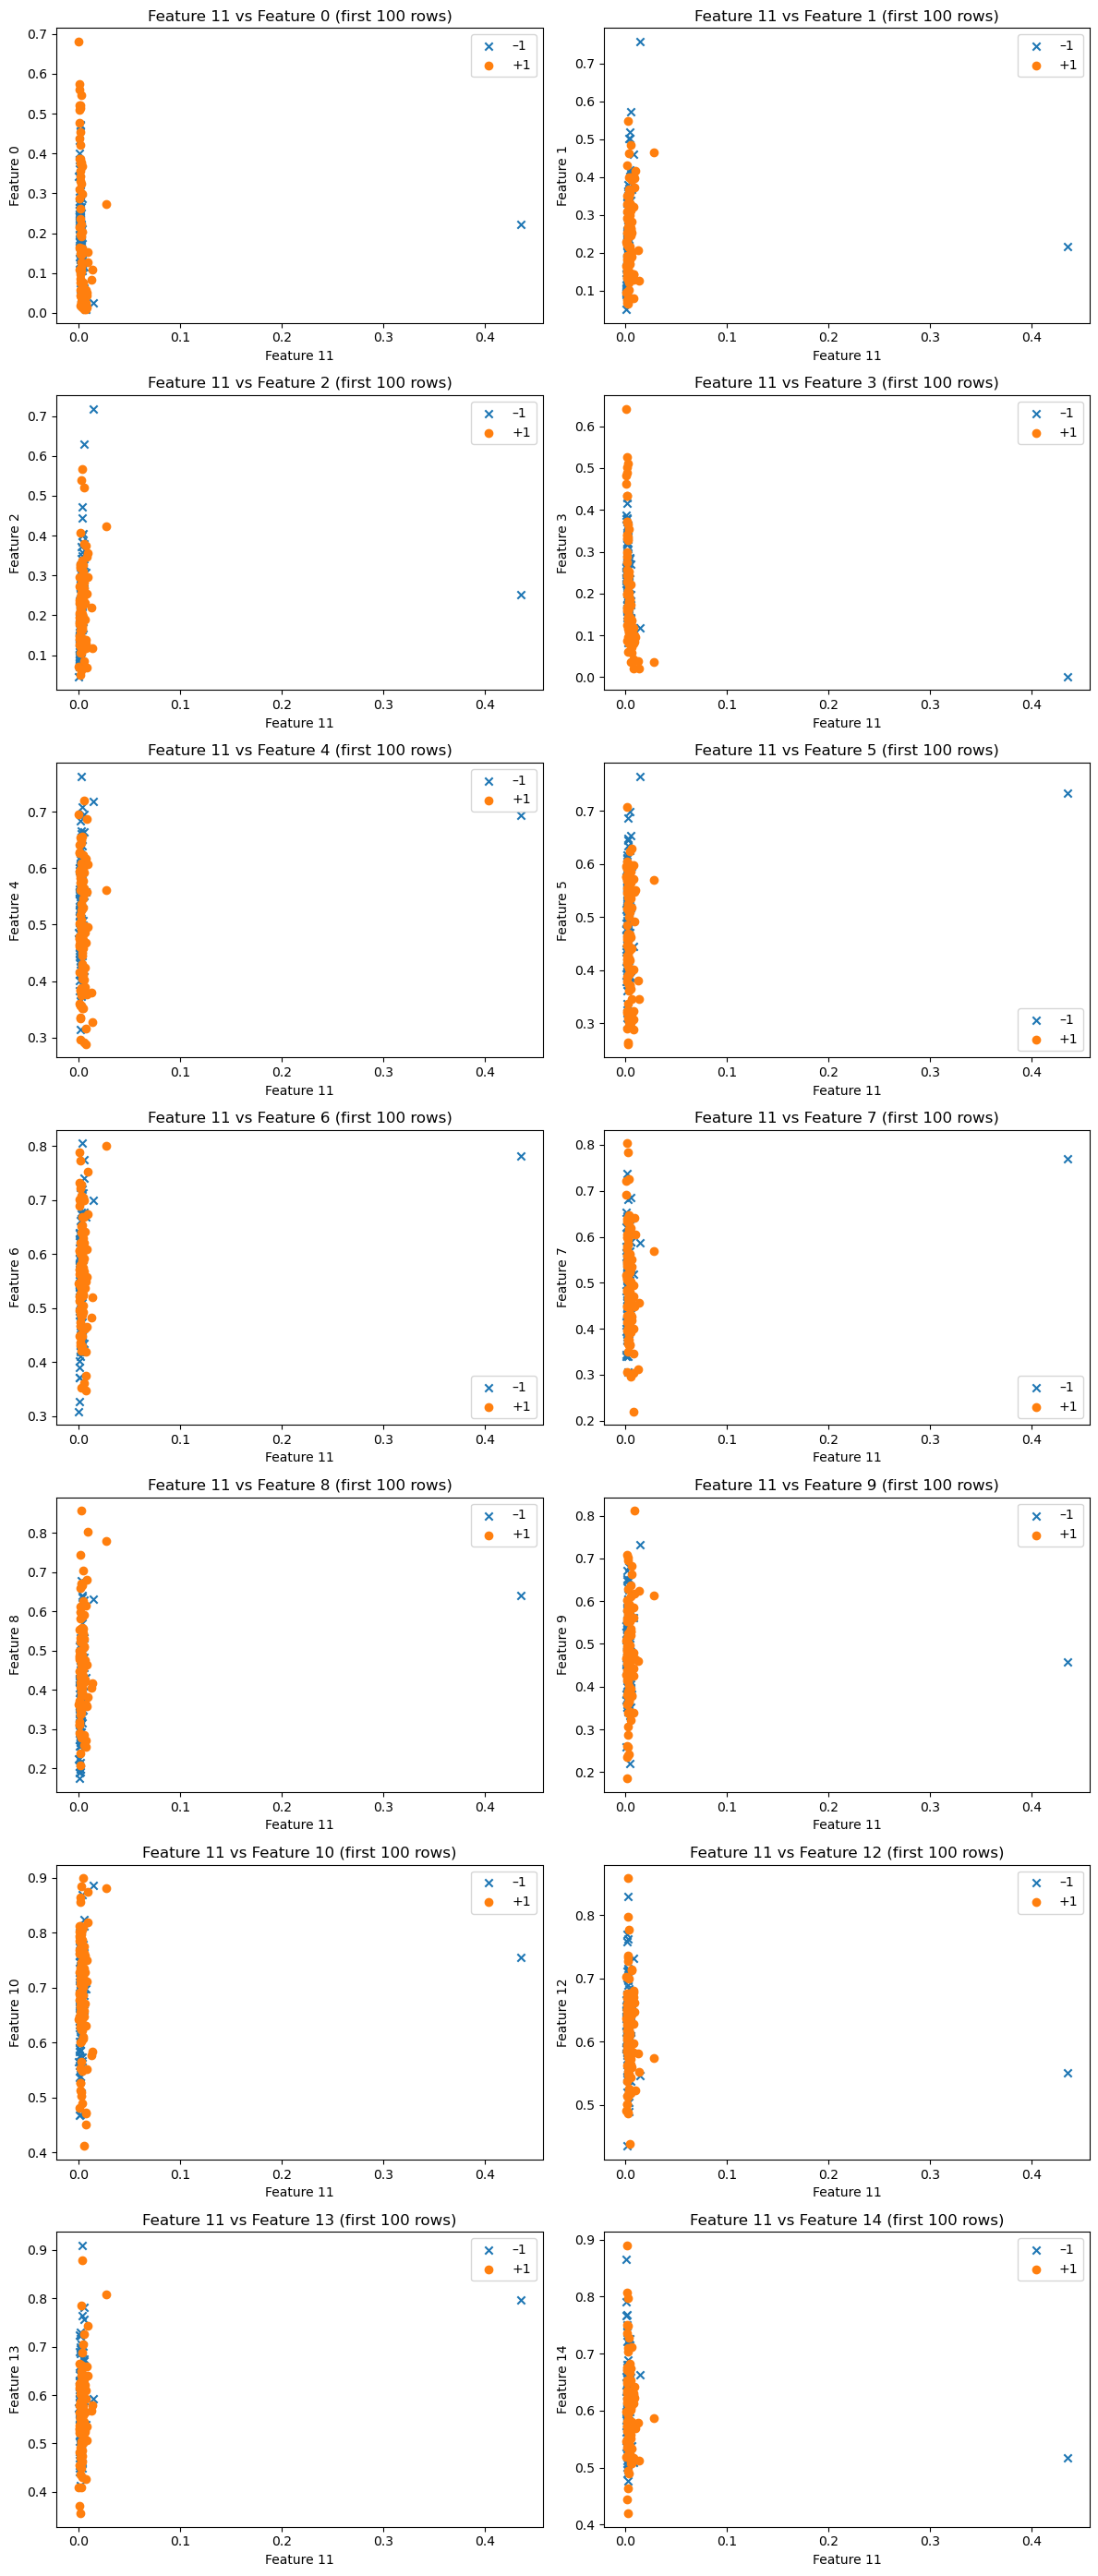

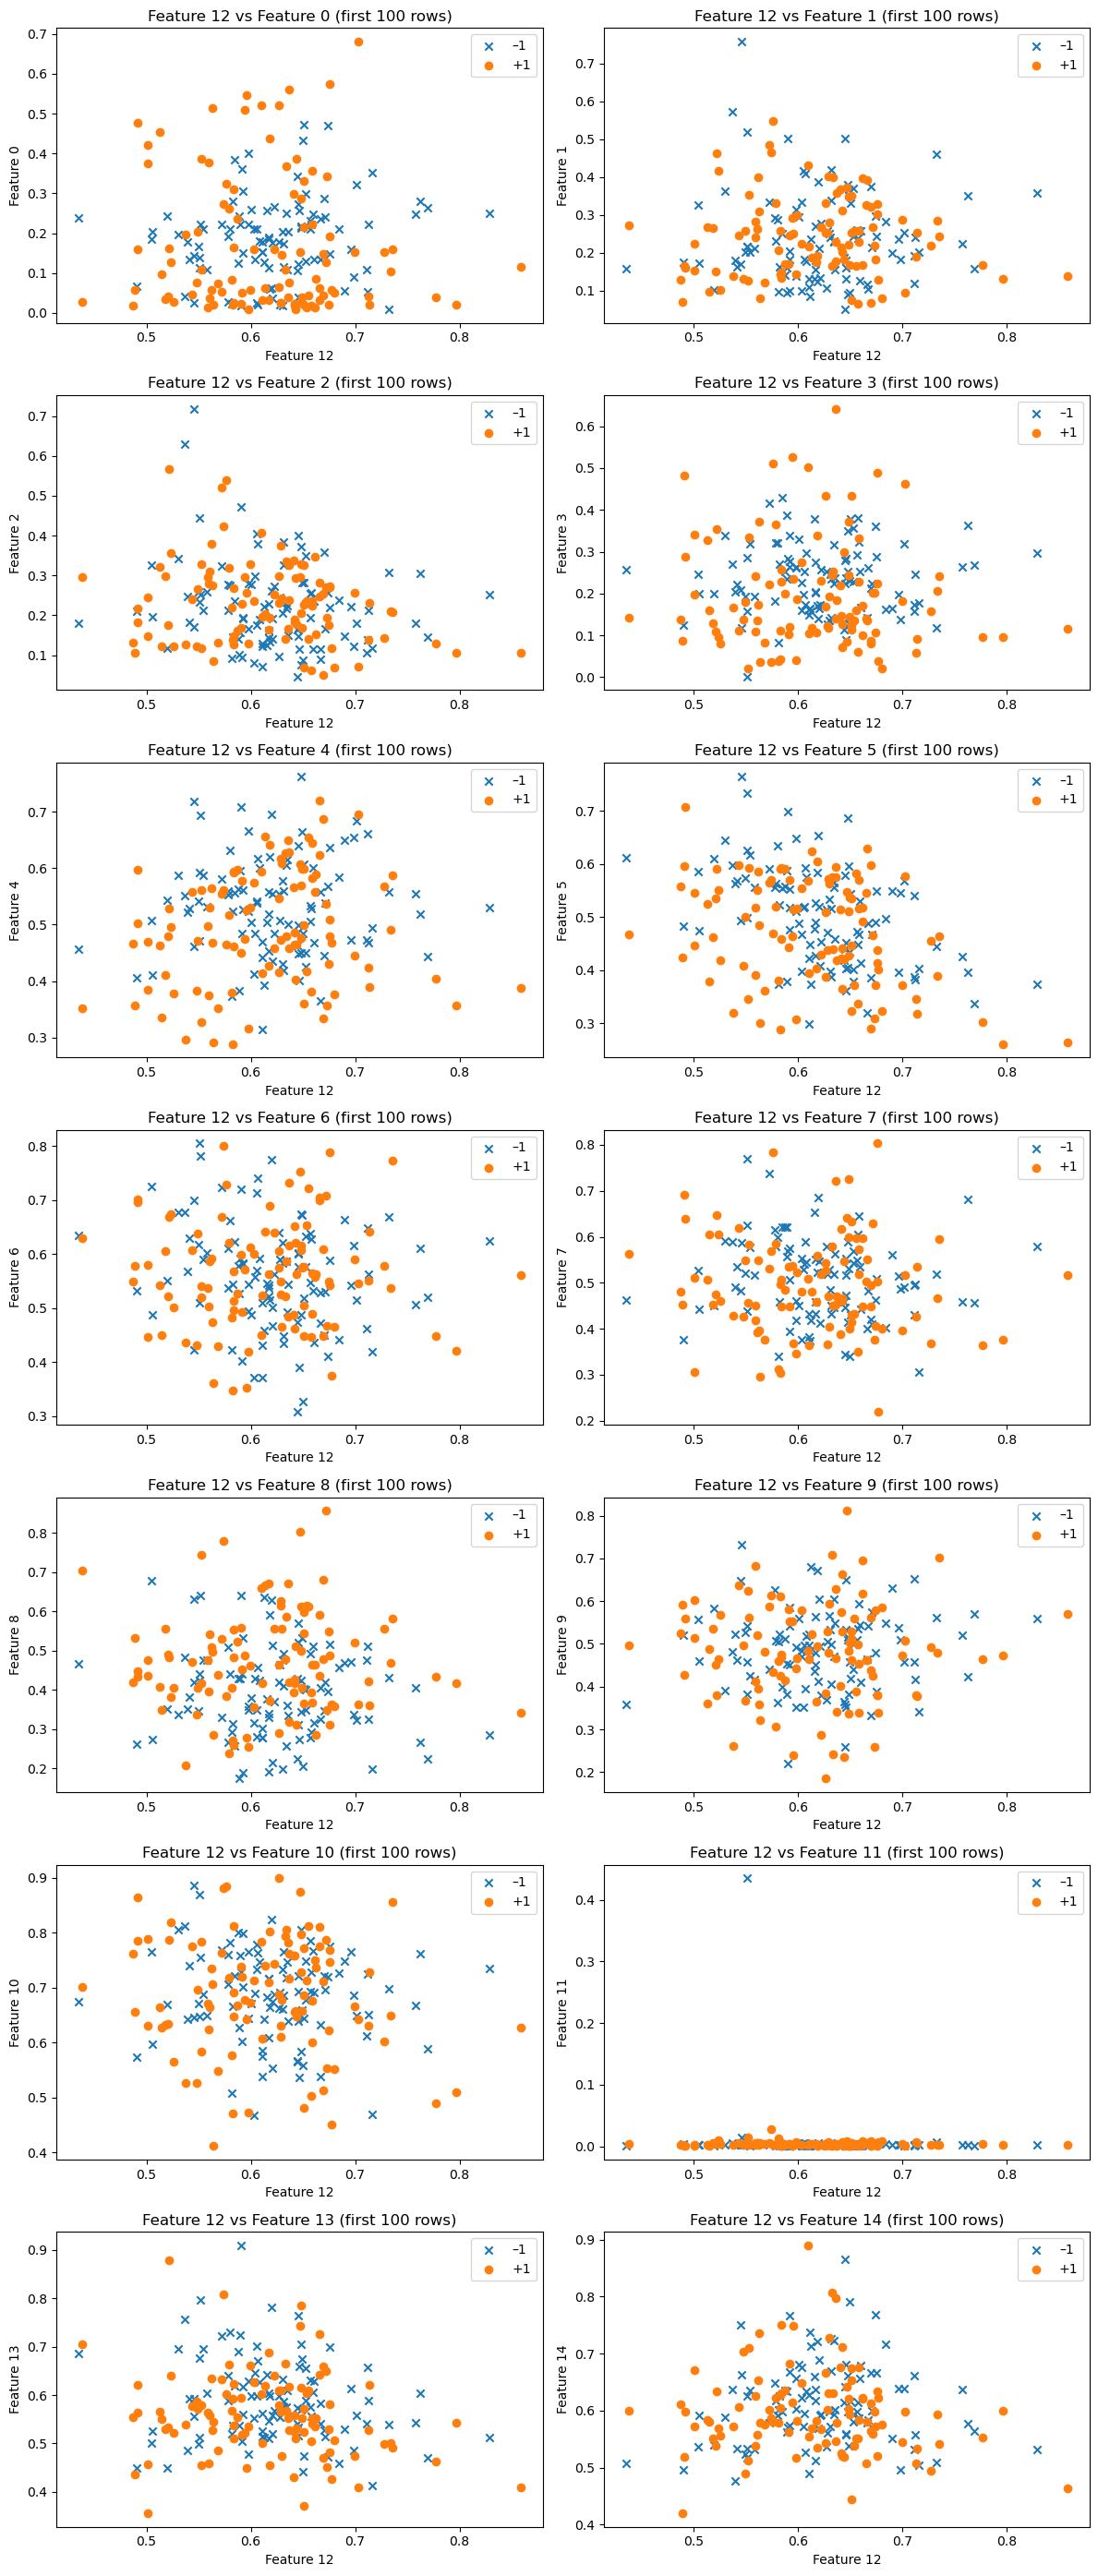

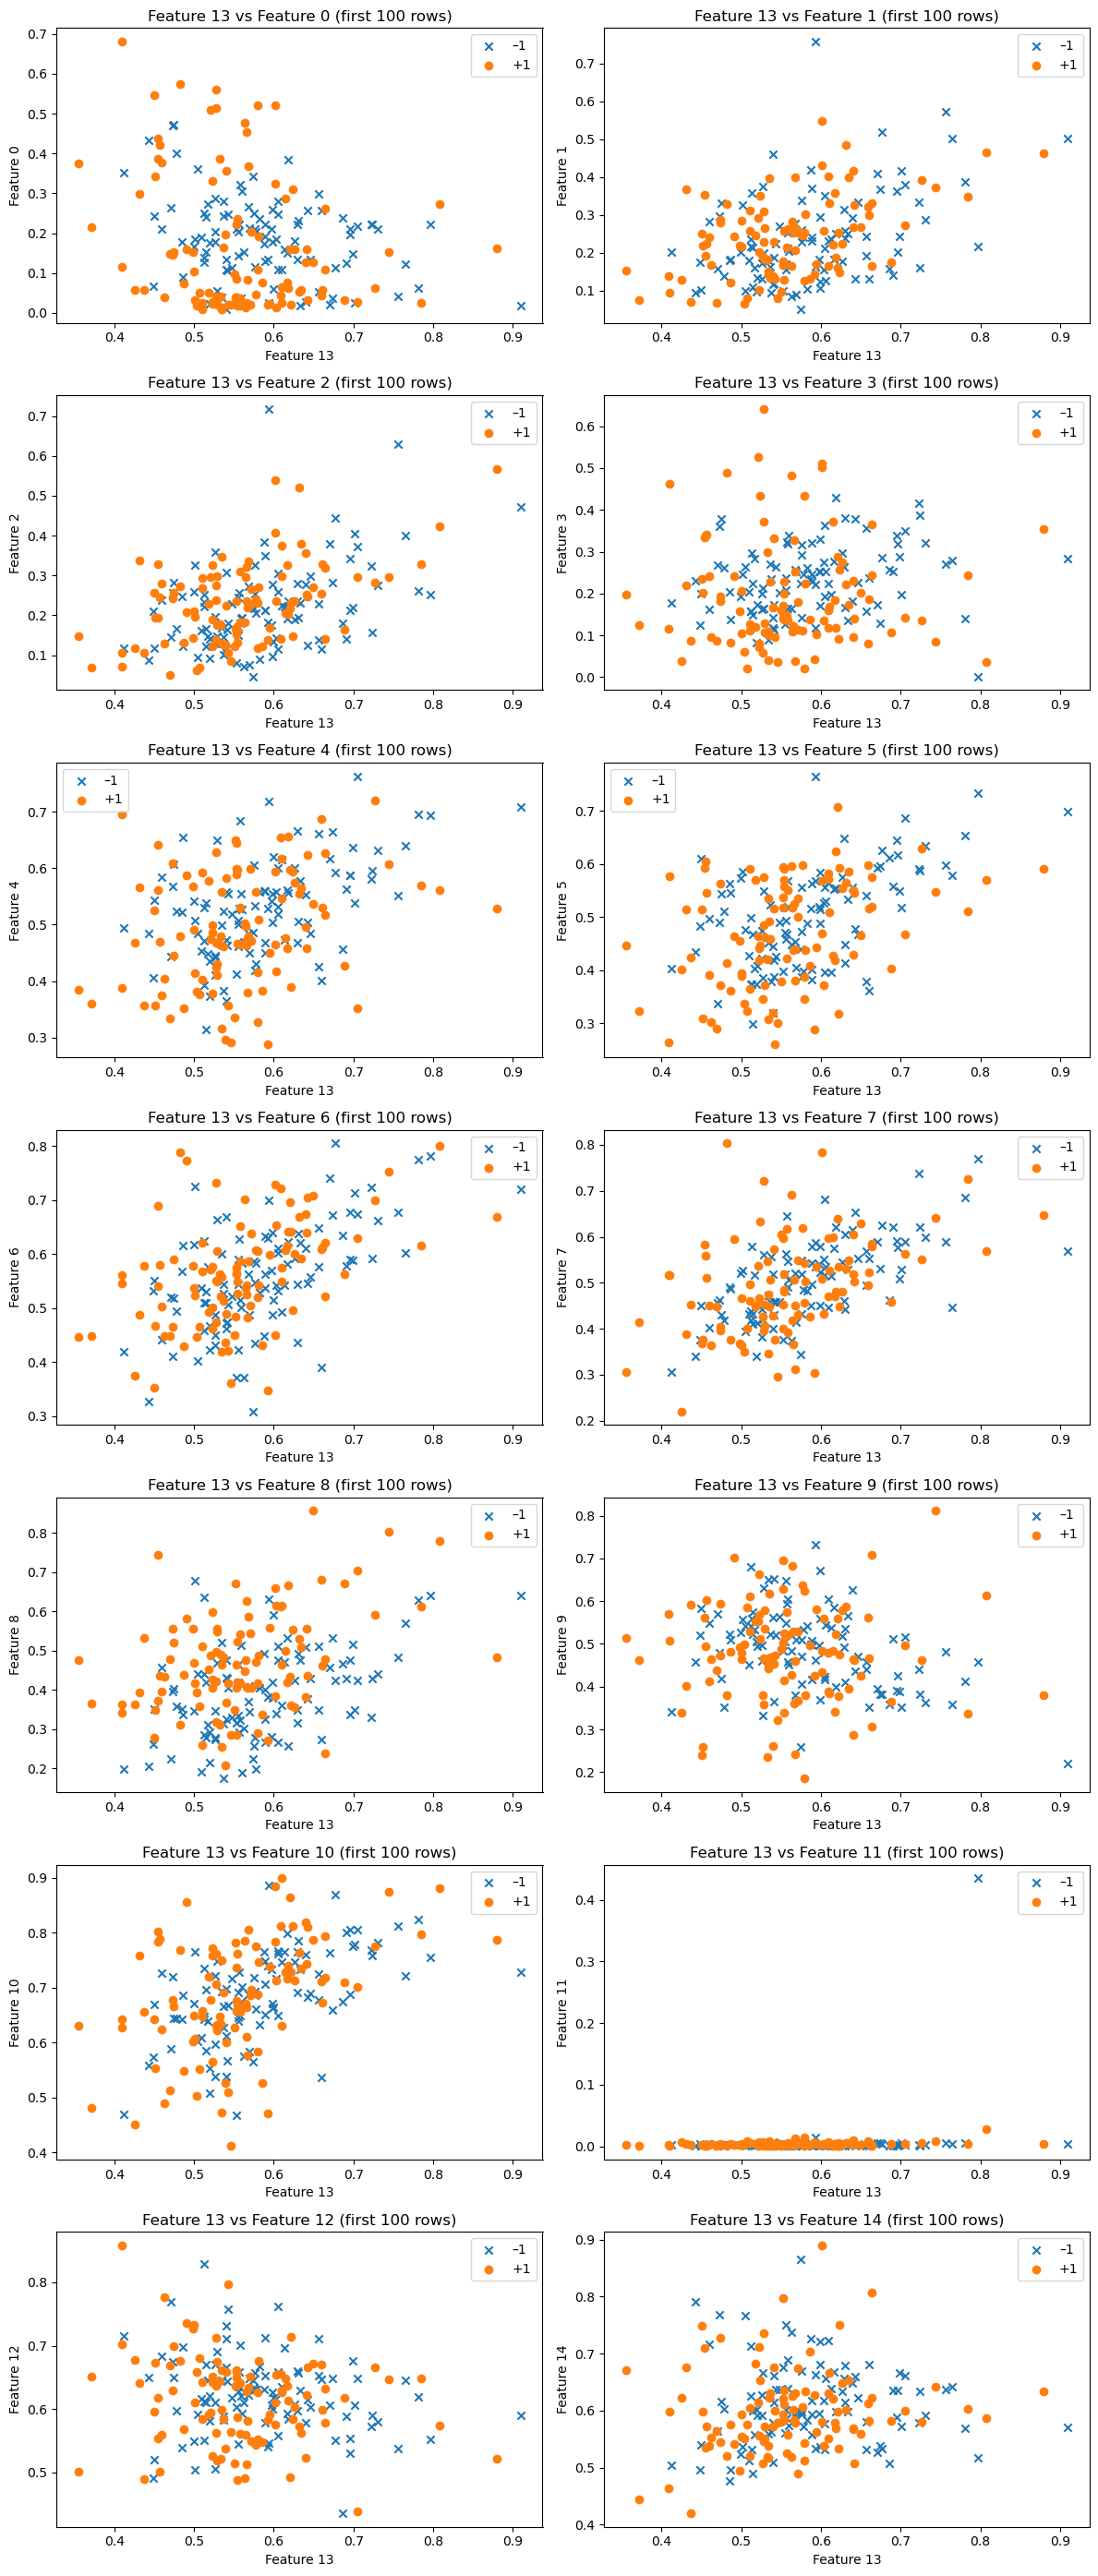

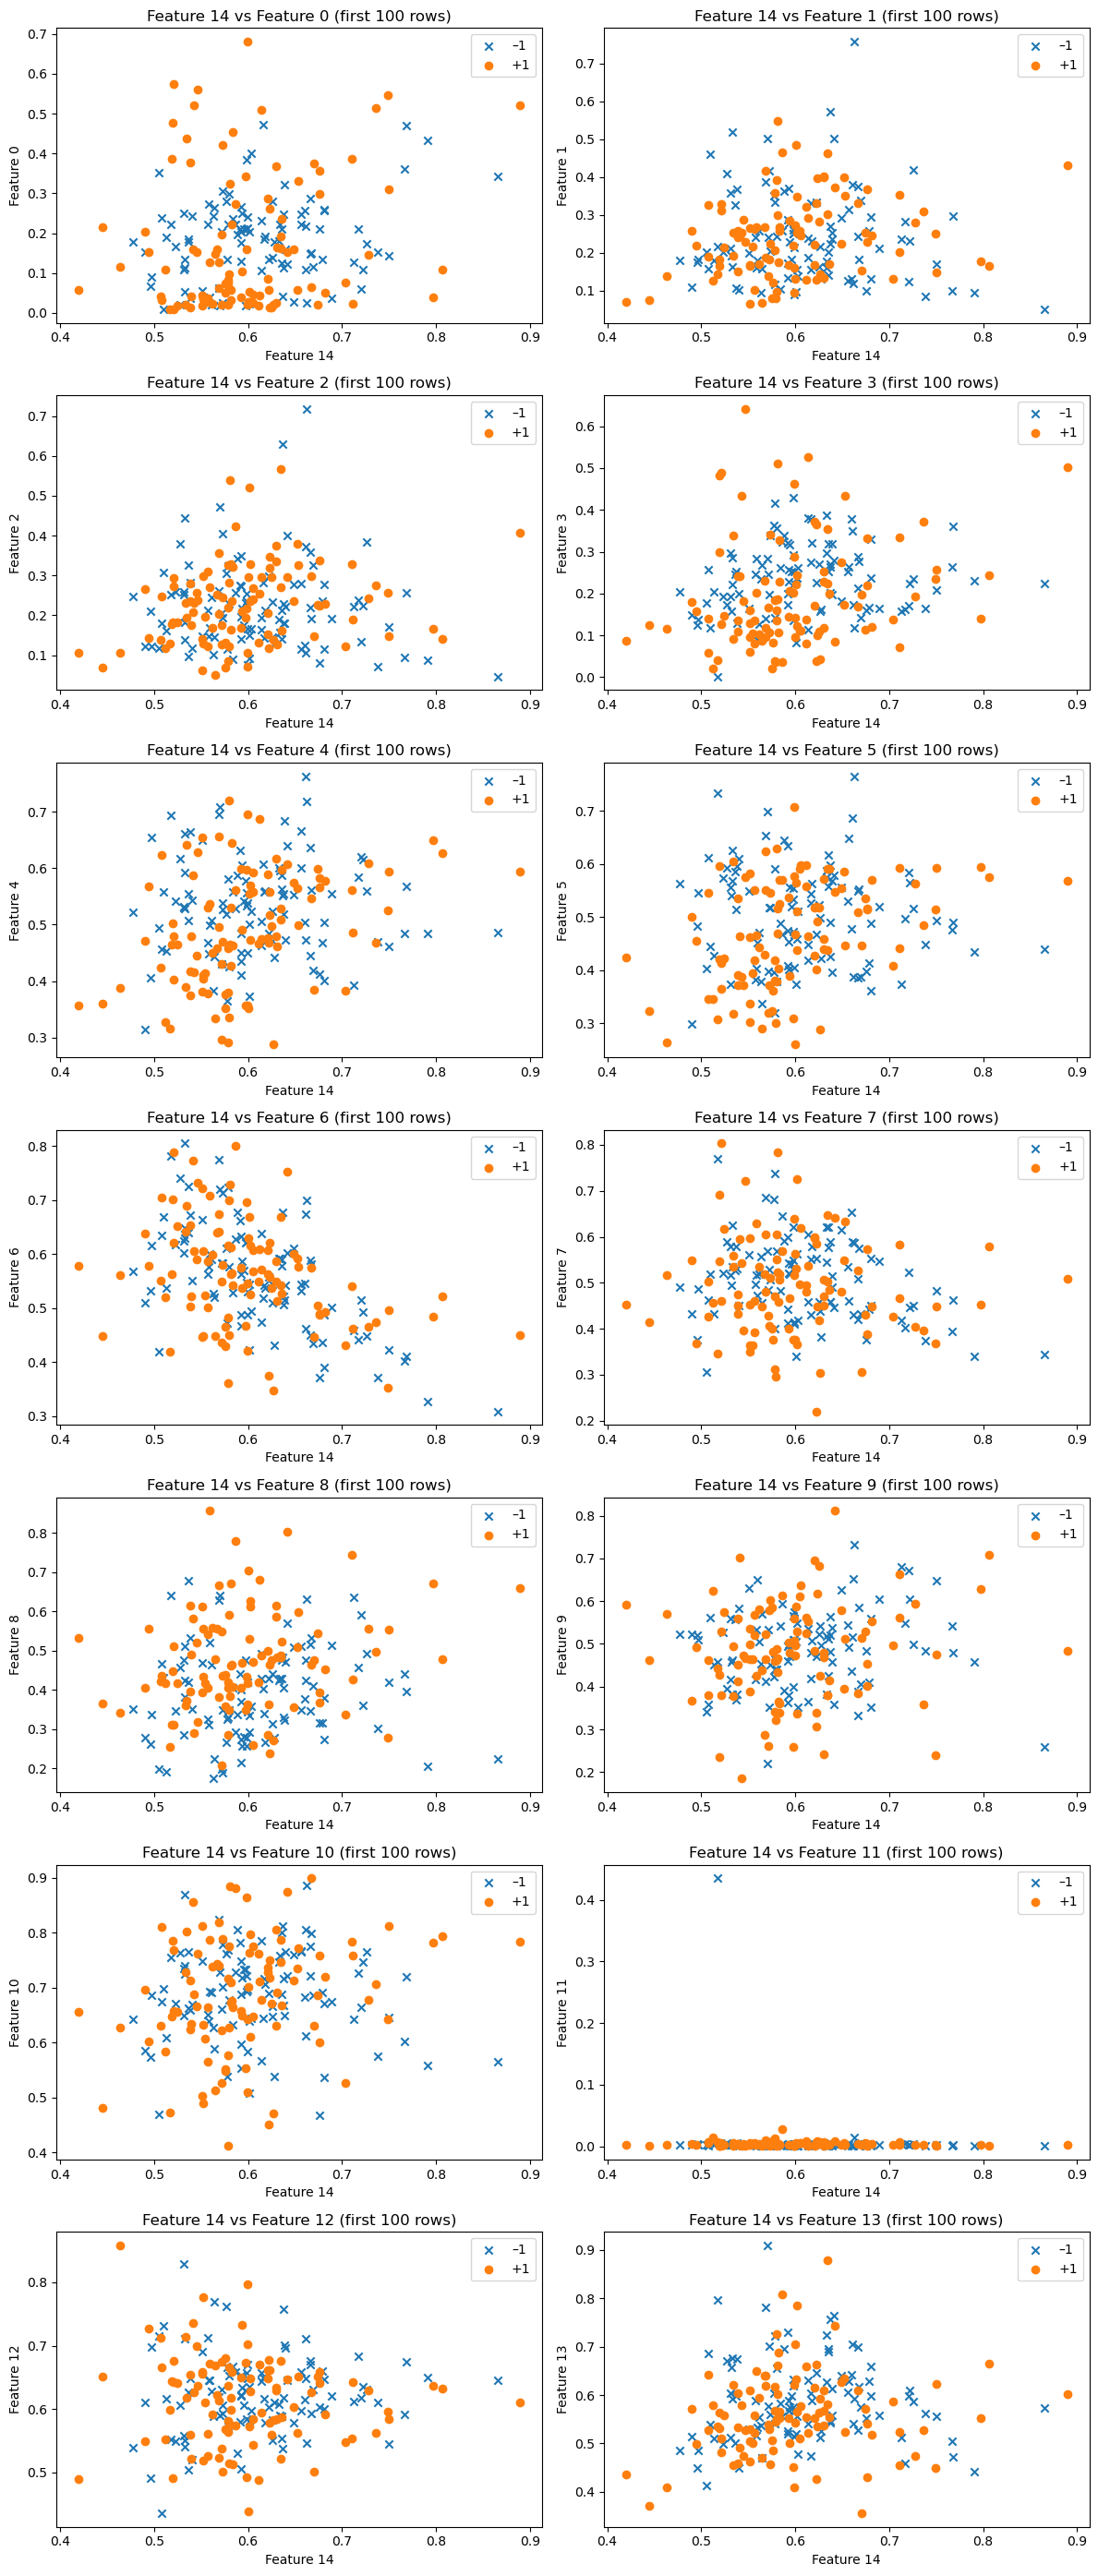

In [ ]:
#create masks for positive and negative labels
neg_mask = (y_angry_happy == -1)
pos_mask = (y_angry_happy == +1)

#Loop through each feature f in {0,…,14}
for f in range(15):
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 28))
    axes = axes.flatten()
    plot_idx = 0

    #Plot feature f vs every other feature j != f
    for j in range(15):
        if j == f:
            continue
        ax = axes[plot_idx]
        ax.scatter(
            X_angry_happy[neg_mask, f][:100],
            X_angry_happy[neg_mask, j][:100],
            marker='x',
            label='–1'
        )
        ax.scatter(
            X_angry_happy[pos_mask, f][:100],
            X_angry_happy[pos_mask, j][:100],
            marker='o',
            label='+1'
        )
        ax.set_xlabel(f'Feature {f}')
        ax.set_ylabel(f'Feature {j}')
        ax.set_title(f'Feature {f} vs Feature {j} (first 100 rows)')
        ax.legend()
        plot_idx += 1

    plt.tight_layout()
    plt.show()

In [ ]:
from AppliedML.courselib.models.linear_models import LinearBinaryClassification

from AppliedML.courselib.models.svm import LinearSVM

from AppliedML.courselib.utils.metrics import binary_accuracy

In [ ]:
d = X_angry_happy.shape[1]                 
w0 = [0]*d          
b0 = 0           

metrics_dict = {
    "accuracy": binary_accuracy,
    "loss": mean_squared_error
}

optimizer = GDOptimizer(learning_rate=1e-3)  
model_angry_happy = LinearBinaryClassification(w=w0, b=b0, optimizer=optimizer)


metrics_history_ah = model_angry_happy.fit(X_angry_happy, y_angry_happy, num_epochs=10000, batch_size=len(X_angry_happy), compute_metrics=True, metrics_dict=metrics_dict)

▶ decision_function output: <class 'numpy.ndarray'> (8042,)
▶ ground-truth        : <class 'numpy.ndarray'> (8042,)
▶ decision_function output: <class 'numpy.ndarray'> (8042,)
▶ ground-truth        : <class 'numpy.ndarray'> (8042,)
▶ decision_function output: <class 'numpy.ndarray'> (8042,)
▶ ground-truth        : <class 'numpy.ndarray'> (8042,)
▶ decision_function output: <class 'numpy.ndarray'> (8042,)
▶ ground-truth        : <class 'numpy.ndarray'> (8042,)
▶ decision_function output: <class 'numpy.ndarray'> (8042,)
▶ ground-truth        : <class 'numpy.ndarray'> (8042,)
▶ decision_function output: <class 'numpy.ndarray'> (8042,)
▶ ground-truth        : <class 'numpy.ndarray'> (8042,)
▶ decision_function output: <class 'numpy.ndarray'> (8042,)
▶ ground-truth        : <class 'numpy.ndarray'> (8042,)
▶ decision_function output: <class 'numpy.ndarray'> (8042,)
▶ ground-truth        : <class 'numpy.ndarray'> (8042,)
▶ decision_function output: <class 'numpy.ndarray'> (8042,)
▶ ground-tru

In [ ]:
print("Model decision range:", np.nanmin(model_angry_happy(X_angry_happy_test)), "–", np.nanmax(model_angry_happy(X_angry_happy_test)))

[-0.9602567  -1.04484766 -1.03475055 ... -0.93107991 -1.05964108
 -1.03541311]
Any NaNs in X? False
Any NaNs in y? False
X finite range: -1 – -1


In [ ]:
X_angry_happy_test, y_angry_happy_test = prepare_data_two_emotions(df_test, 0, 3)
print(model_angry_happy(X_angry_happy)[10:200])


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


The final train accuracy: 67.6%
Test accuracy: 67.8%


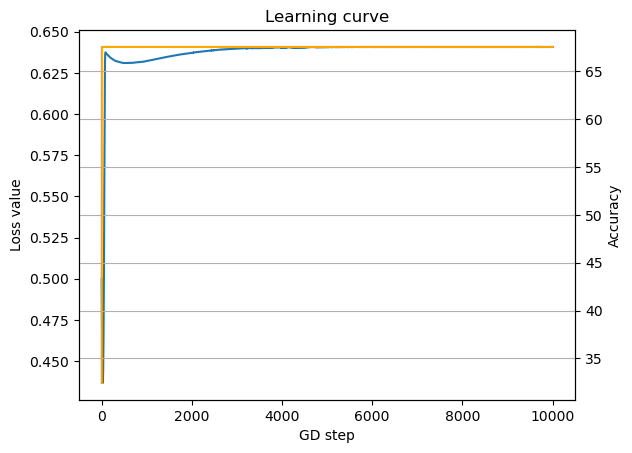

In [ ]:
fig, ax = plt.subplots()

ax.plot(range(len(metrics_history_ah['loss'])), metrics_history_ah['loss'])
ax.set_ylabel('Loss value')

ax2 = ax.twinx()
ax2.plot(range(len(metrics_history_ah['accuracy'])), metrics_history_ah['accuracy'], color='orange')
ax2.set_ylabel('Accuracy')

ax.set_xlabel('GD step')

plt.title('Learning curve')
plt.grid()

print(f"The final train accuracy: {round(metrics_history_ah['accuracy'][-1],1)}%")
print(f"Test accuracy: {round(binary_accuracy(model_angry_happy(X_angry_happy_test), y_angry_happy_test),1)}%")